# Imports packages and assign variables

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, RadiusNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import xgboost as xgb
import time
file_paths = [
    #'testData/1.10_A_30s_600ms_3/',
    #'testData/2.50_A_30s_600ms_3/',
    #'testData/3.90_A_30s_600ms_3/',
    'testData/4.130_A_30s_600ms_3/',
    #'testData/5.60_A_30s_200ms_3/',
    #'testData/6.60_A_30s_500ms_3/',
    #'testData/7.60_A_30s_800ms_3/',
    #'testData/8.60_A_30s_1100ms_3/',
    #'testData/9.60_A_5s_600ms_3/',
    #'testData/10.60_A_20s_600ms_3/',
    #'testData/11.60_A_35s_600ms_3/',
    #'testData/12.60_A_50s_600ms_3/',
    'testData/13.60_A_30s_600ms_2/',
    #'testData/14.60_A_30s_600ms_4/',
    #'testData/15.60_A_30s_600ms_6/',
    #'testData/16.60_A_30s_600ms_8/',
    #'testData/17.60_A_30s_600ms_3/',
    'testData/18.60_A+NA+AZA_30s_600ms_3/',
    #'testData/19.60_A+NA_30s_600ms_3/',
    #'testData/20.60_A+AZA_30s_600ms_3/',
    #'testData/21.60_A_30s_600ms_1/'
]
file_paths2 = [
    'testData/22.10_A+NA+AZA_30s_600ms_3/',
    'testData/23.130_A+NA+AZA_30s_600ms_3/',
    'testData/24.60_A+NA+AZA_30s_200ms_3/',
    'testData/25.60_A+NA+AZA_30s_1100ms_3/',
    'testData/26.60_A+NA+AZA_5s_600ms_3/',
    'testData/27.60_A+NA+AZA_50s_600ms_3/',
    'testData/28.60_A+NA+AZA_30s_600ms_2/',
    'testData/29.60_A+NA+AZA_30s_600ms_8/',
]

labels = [ _[12:-1] if _ [11] == '.' else _[11:-1] for _ in file_paths ]
labels2 = [ _[12:-1] if _ [11] == '.' else _[11:-1] for _ in file_paths2 ]

# XBG predict parameter (Robiłem w ramach testu czy coś wychodzi)

130_A_30s_600ms_3
Train new model...
Mean Squared Error: 0.0051083828233830396
R² score: 0.8846499916428662


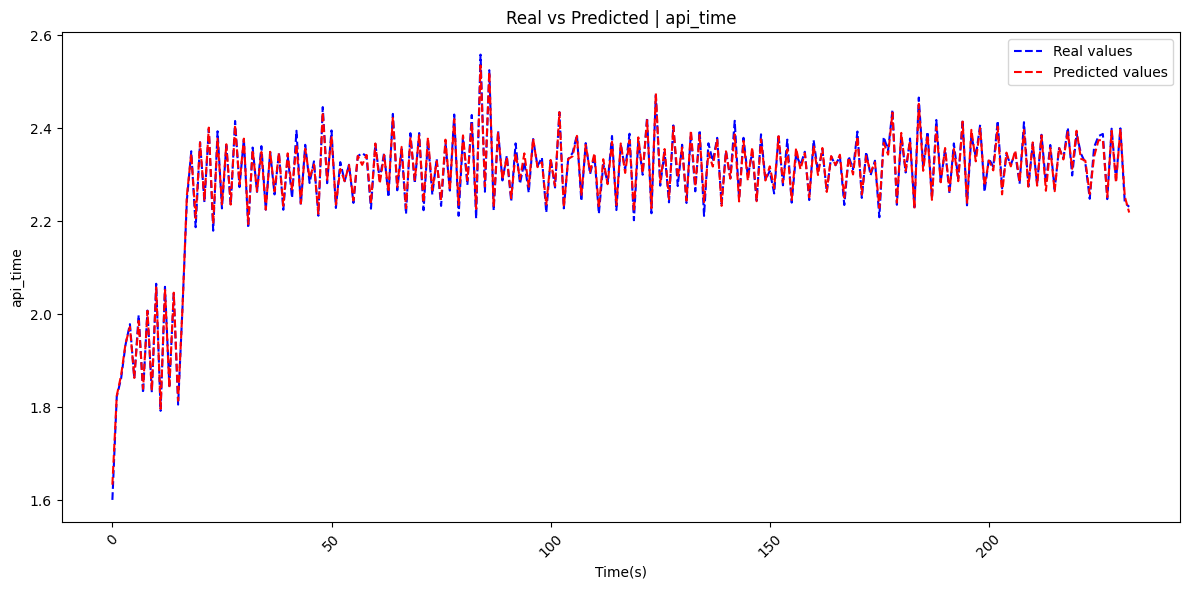

Train new model...
Mean Squared Error: 1.404659816914388e-06
R² score: 0.9286585022680538


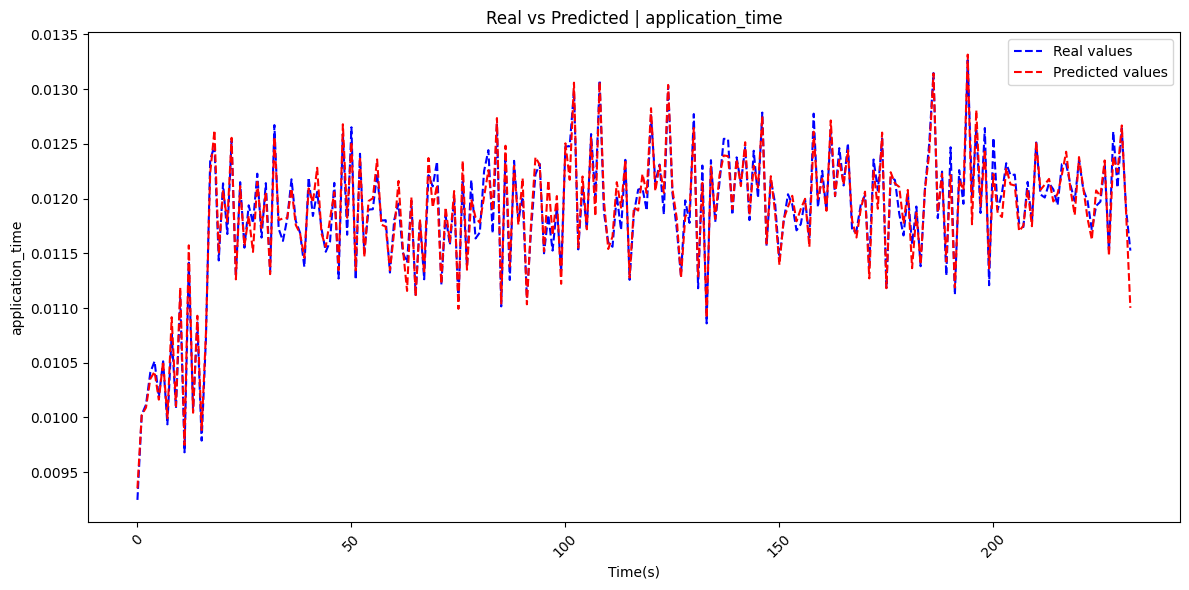

Train new model...
Mean Squared Error: 5.544237540464934e-07
R² score: 0.9545067271185673


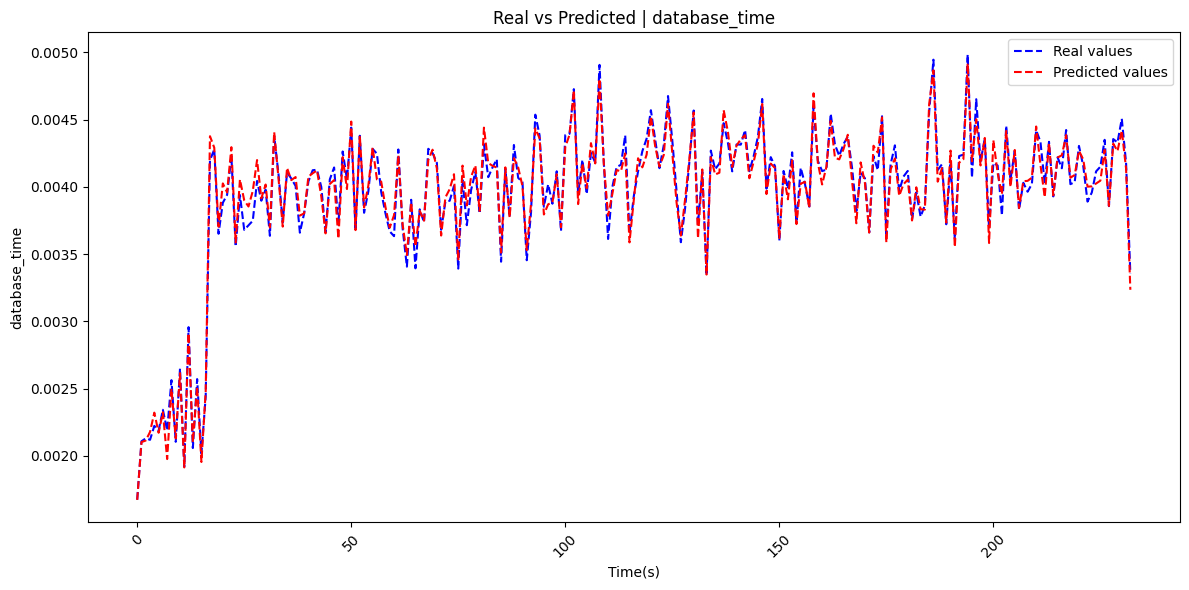

60_A_30s_600ms_2
Train new model...
Mean Squared Error: 0.003288082235546139
R² score: 0.7532949243151409


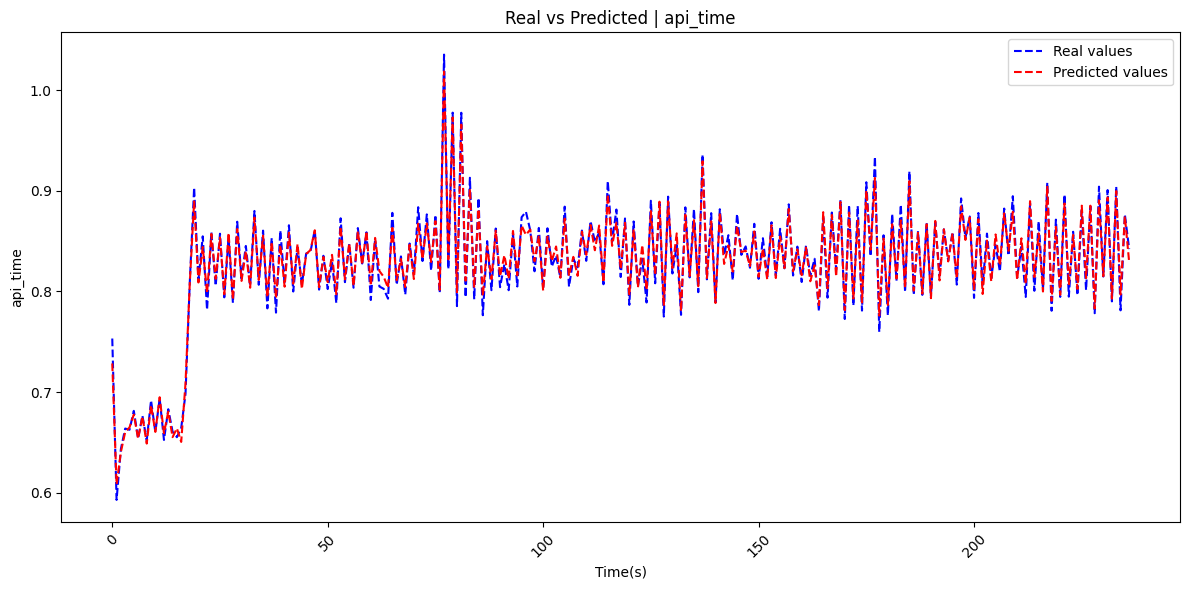

Train new model...
Mean Squared Error: 1.1571202623869025e-06
R² score: 0.9358480474341877


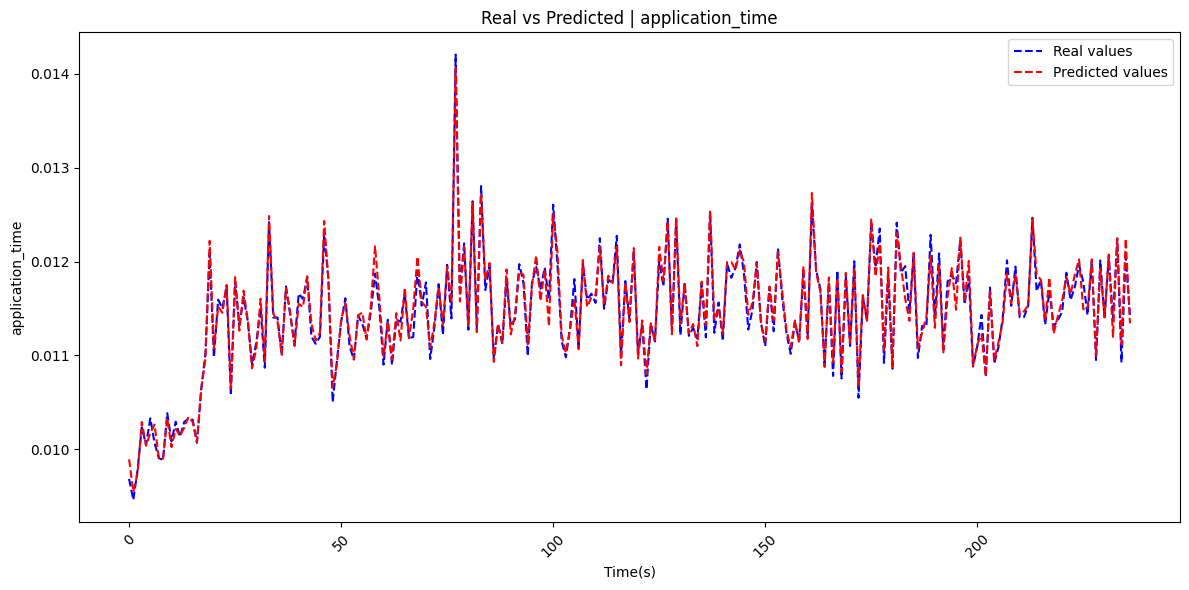

Train new model...
Mean Squared Error: 3.97076193945979e-07
R² score: 0.9644991223601531


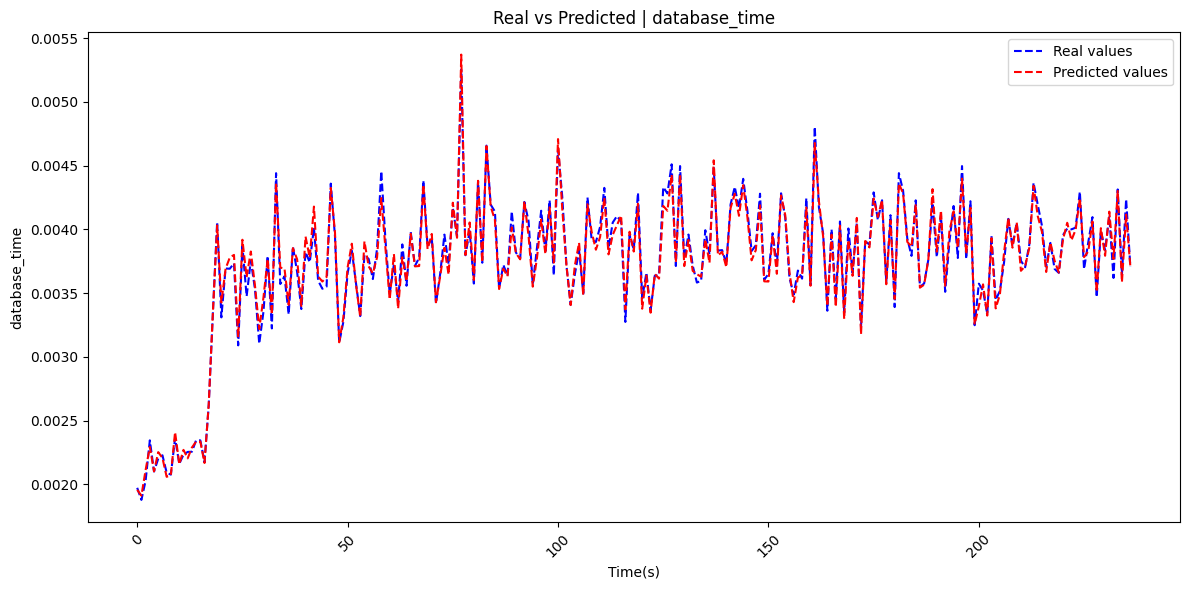

60_A+NA+AZA_30s_600ms_3
Train new model...
Mean Squared Error: 0.0036441043927953206
R² score: 0.7464064829297028


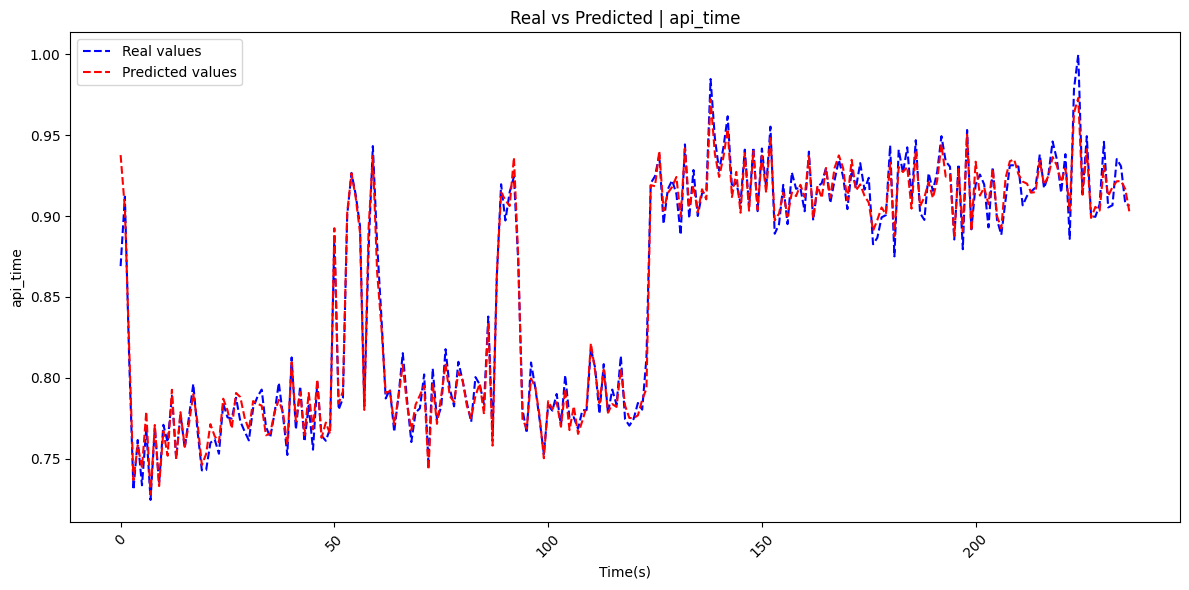

Train new model...
Mean Squared Error: 3.596782345378169e-05
R² score: 0.3103517988516331


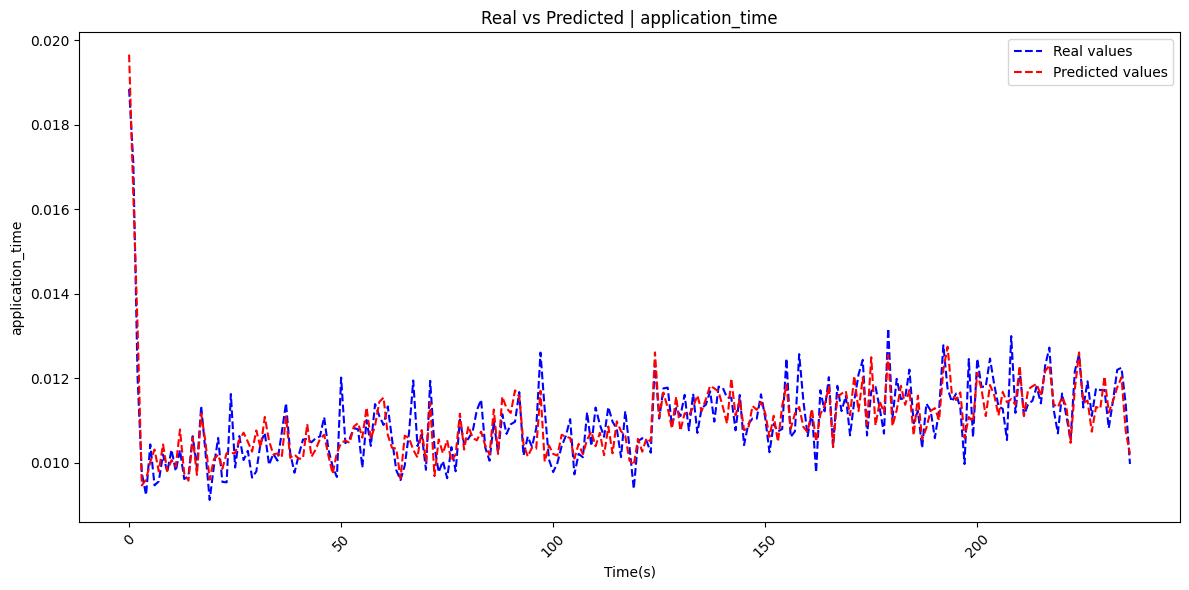

Train new model...
Mean Squared Error: 6.251535155864908e-07
R² score: 0.8926109218388782


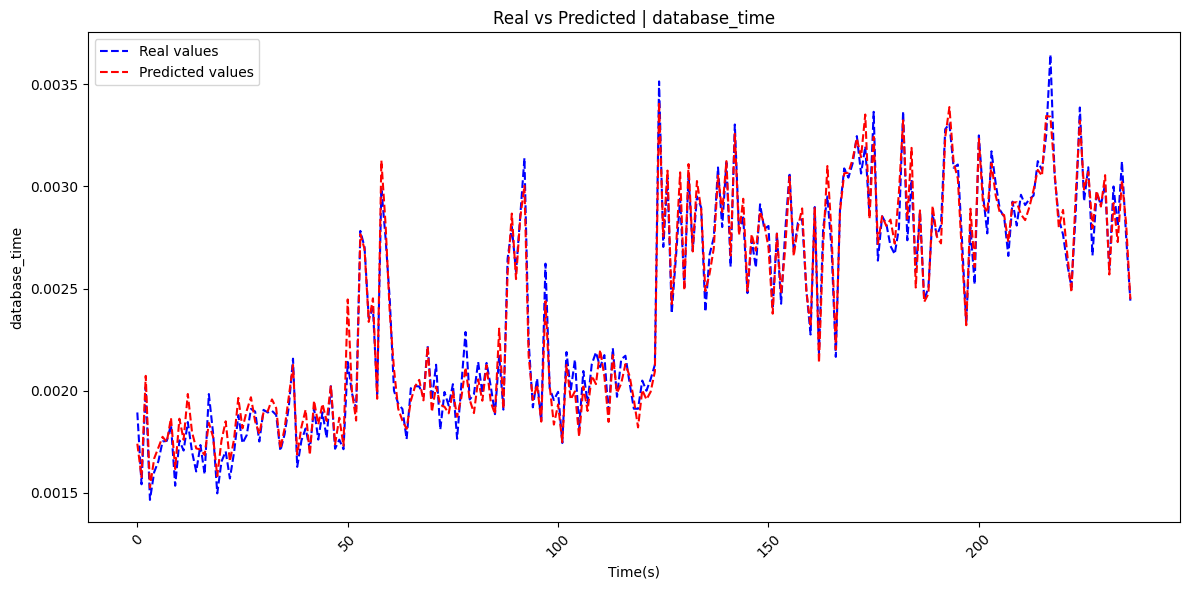

In [2]:
def xgbTree(path, param):
    file_path = f'{path}/stockApp_merged_data.csv'
    data = pd.read_csv(file_path)
    timestamps = data['timestamp'] 
    if 'user_class' in data:
      data = data.drop(columns=["user_class"])
    data = data.drop(columns=['timestamp', 'endpoint_url', "api_method",'application_time_trade','database_time_trade','number_of_sell_offers','number_of_buy_offers'])
    X = data.drop(columns=[param])
    y = data[param]

    X_train, X_test, y_train, y_test, timestamps_train, timestamps_test = train_test_split(X, y, timestamps, test_size=0.2, random_state=42)
    train_data = xgb.DMatrix(X_train, label=y_train)
    test_data = xgb.DMatrix(X_test, label=y_test)
    params = {
            'tree_method': 'hist', 
            'device': 'cpu',
            'objective': 'reg:squarederror',
            'max_depth': 10,
            'learning_rate': 0.1,
        }
    print("Train new model...")
    model = xgb.train(params, train_data, num_boost_round=100)

    y_pred = model.predict(test_data)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'R² score: {r2}')

    y_pred = model.predict(test_data)
    '''
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Real values')
    plt.ylabel('Predicted values')
    plt.title('Real vs Predicted')
    #plt.show()
    '''

    data = pd.DataFrame({
        'timestamp': timestamps_test,
        'y_test': y_test,
        'y_pred': y_pred
    })

    data['timestamp'] = pd.to_datetime(data['timestamp'])
    start_time = data['timestamp'].min()
    data = data.set_index('timestamp').resample('15s').mean().reset_index()
    data['timestamp'] = (data['timestamp'] - start_time).dt.total_seconds()
    data = data.dropna()
    aggregated = data

    plt.figure(figsize=(12, 6))
    plt.plot(aggregated.index, aggregated['y_test'], label='Real values', color='blue', linestyle='dashed')
    plt.plot(aggregated.index, aggregated['y_pred'], label='Predicted values', color='red', linestyle='dashed')
    plt.xlabel('Time(s)')
    plt.ylabel(param)
    plt.title(f'Real vs Predicted | {param}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
  
i = 0 
for test_dir in file_paths:
              print(labels[i])
              xgbTree(test_dir, 'api_time')
              xgbTree(test_dir, 'application_time')
              xgbTree(test_dir, 'database_time')
              i+=1

# Predict user class with various methods

10_A+NA+AZA_30s_600ms_3
Xgb time: 0.956085205078125
              precision    recall  f1-score   support

           0       0.67      0.46      0.54      6928
           1       0.75      0.93      0.83     13020
           2       0.98      0.48      0.65      1838

    accuracy                           0.74     21786
   macro avg       0.80      0.62      0.67     21786
weighted avg       0.74      0.74      0.72     21786



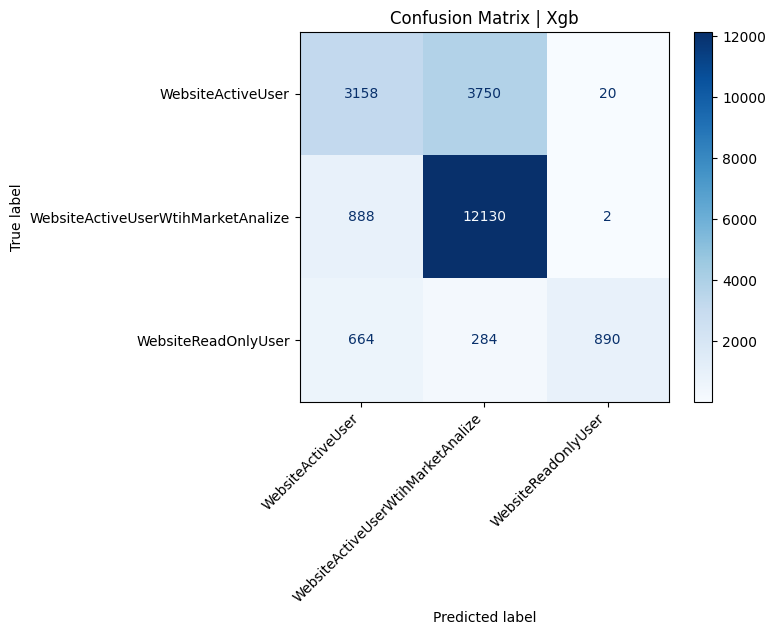

ExtraTreesClassifier time: 14.735284566879272
              precision    recall  f1-score   support

           0       0.71      0.36      0.48      6928
           1       0.72      0.97      0.83     13020
           2       1.00      0.48      0.65      1838

    accuracy                           0.73     21786
   macro avg       0.81      0.60      0.65     21786
weighted avg       0.74      0.73      0.70     21786



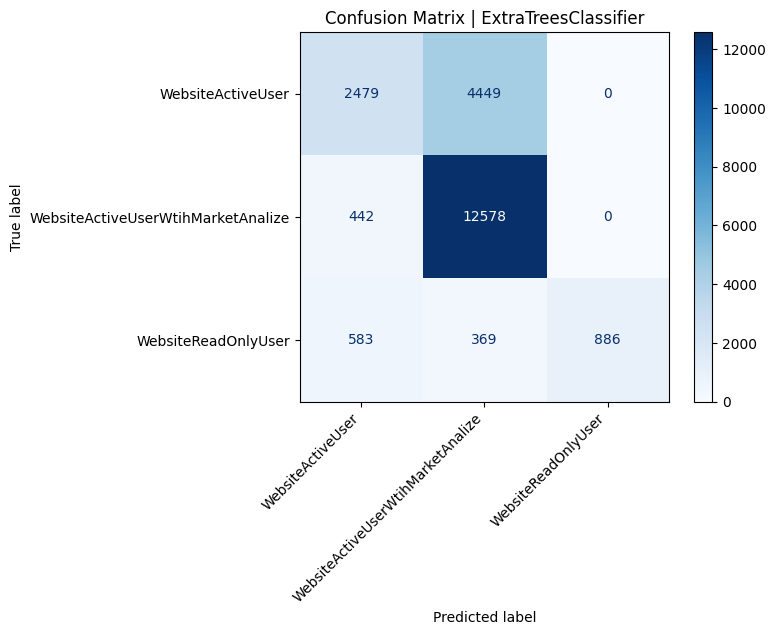

DecisionTreeClassifier time: 0.36227965354919434
              precision    recall  f1-score   support

           0       0.66      0.45      0.53      6928
           1       0.75      0.93      0.83     13020
           2       0.98      0.48      0.65      1838

    accuracy                           0.74     21786
   macro avg       0.80      0.62      0.67     21786
weighted avg       0.74      0.74      0.72     21786



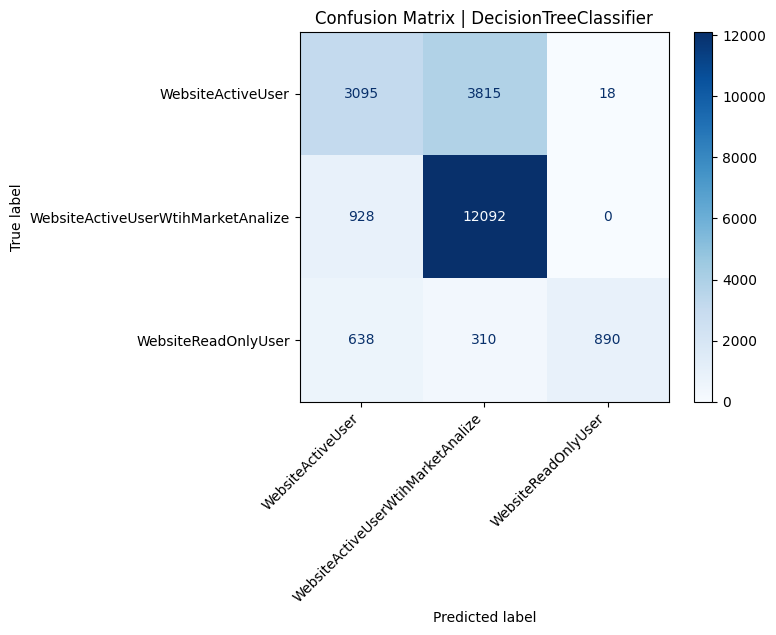

KNeighborsClassifier time: 1.1492445468902588
              precision    recall  f1-score   support

           0       0.59      0.52      0.55      6928
           1       0.76      0.85      0.80     13020
           2       0.88      0.50      0.64      1838

    accuracy                           0.72     21786
   macro avg       0.74      0.63      0.67     21786
weighted avg       0.72      0.72      0.71     21786



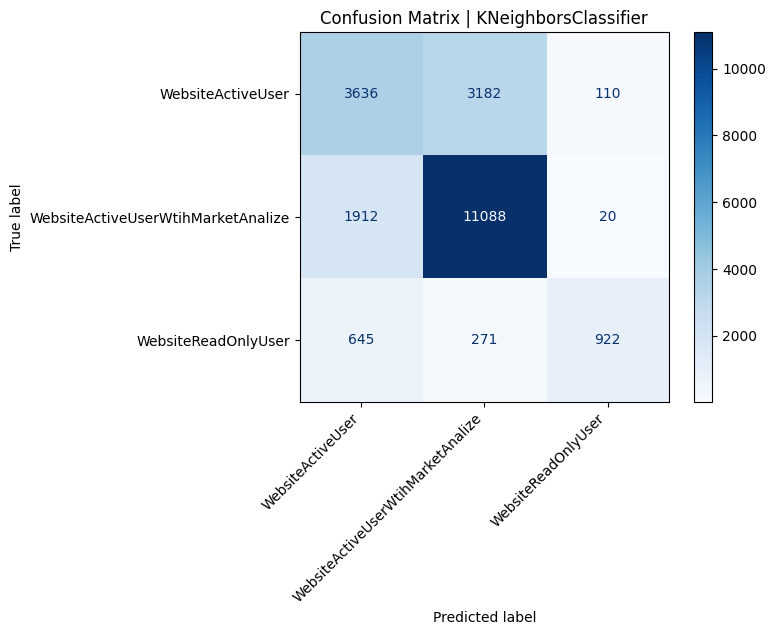

RandomForestClassifier time: 69.098464012146
              precision    recall  f1-score   support

           0       0.69      0.40      0.50      6928
           1       0.73      0.95      0.83     13020
           2       1.00      0.47      0.64      1838

    accuracy                           0.73     21786
   macro avg       0.81      0.61      0.66     21786
weighted avg       0.74      0.73      0.71     21786



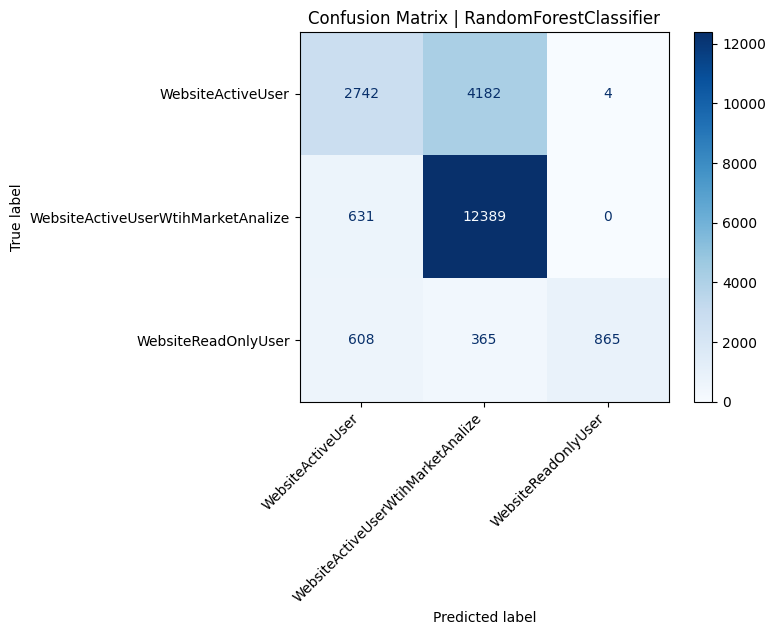

LinearSVC time: 1.0049335956573486
              precision    recall  f1-score   support

           0       0.52      0.51      0.51      6928
           1       0.67      0.77      0.72     13020
           2       0.00      0.00      0.00      1838

    accuracy                           0.62     21786
   macro avg       0.40      0.43      0.41     21786
weighted avg       0.57      0.62      0.59     21786



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

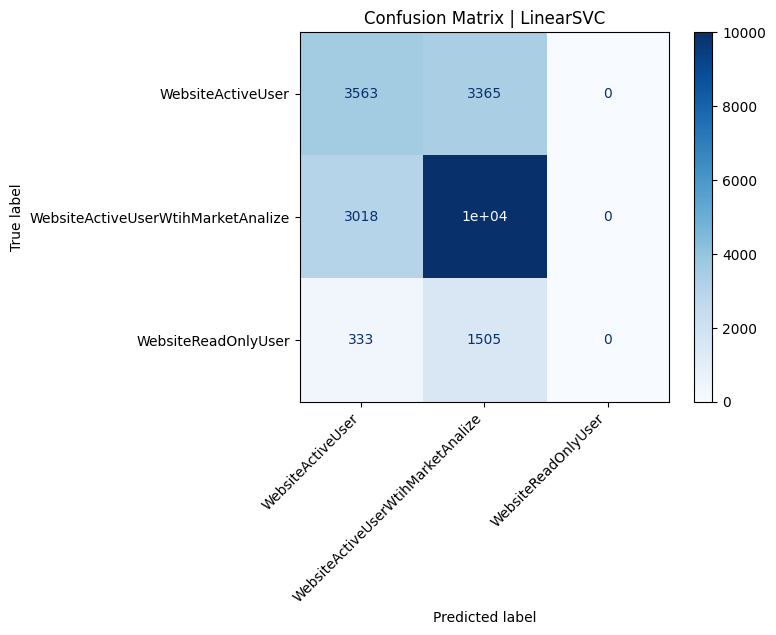

MLPClassifier time: 1753.8864526748657
              precision    recall  f1-score   support

           0       0.66      0.47      0.55      6928
           1       0.75      0.92      0.83     13020
           2       1.00      0.48      0.65      1838

    accuracy                           0.74     21786
   macro avg       0.80      0.62      0.68     21786
weighted avg       0.74      0.74      0.72     21786



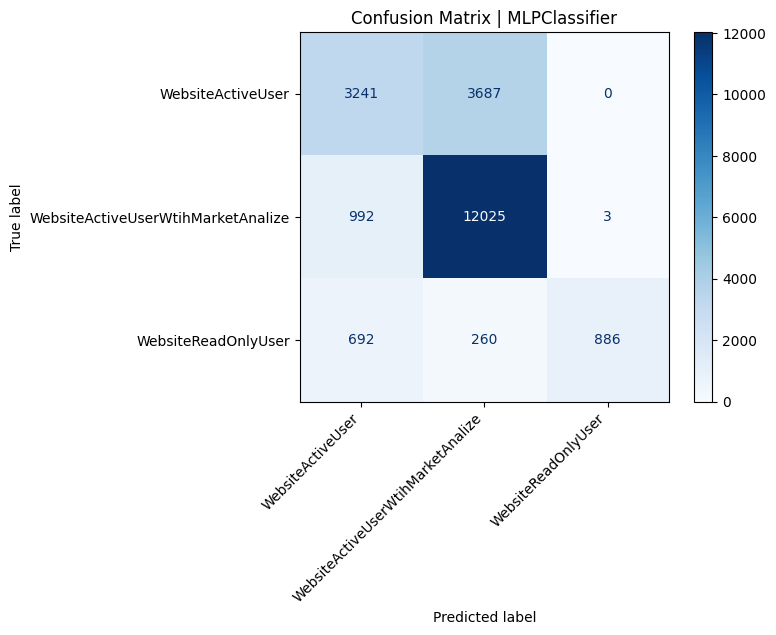

130_A+NA+AZA_30s_600ms_3
Xgb time: 1.3823082447052002
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     15116
           1       0.77      0.89      0.82     17677
           2       0.98      0.50      0.66      6490

    accuracy                           0.79     39283
   macro avg       0.84      0.73      0.76     39283
weighted avg       0.80      0.79      0.78     39283



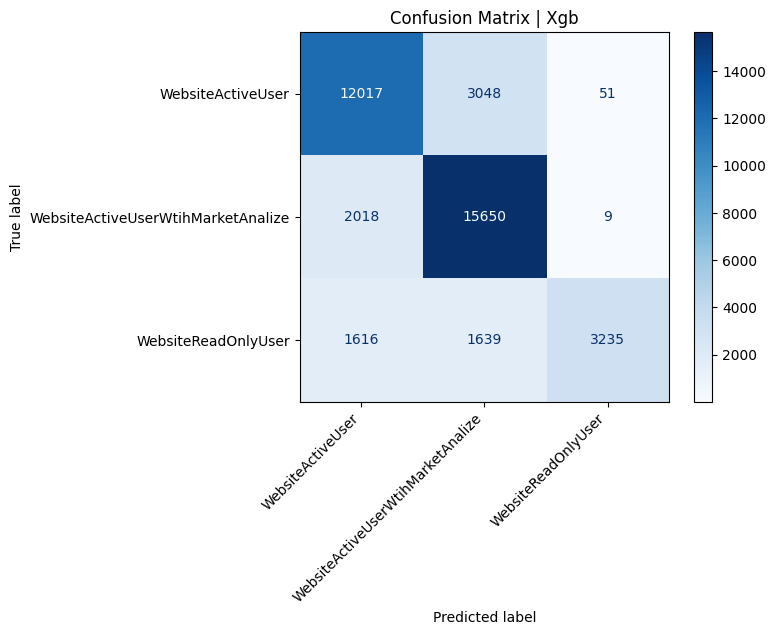

ExtraTreesClassifier time: 23.35399580001831
              precision    recall  f1-score   support

           0       0.77      0.80      0.78     15116
           1       0.77      0.89      0.82     17677
           2       1.00      0.49      0.66      6490

    accuracy                           0.79     39283
   macro avg       0.85      0.73      0.76     39283
weighted avg       0.81      0.79      0.78     39283



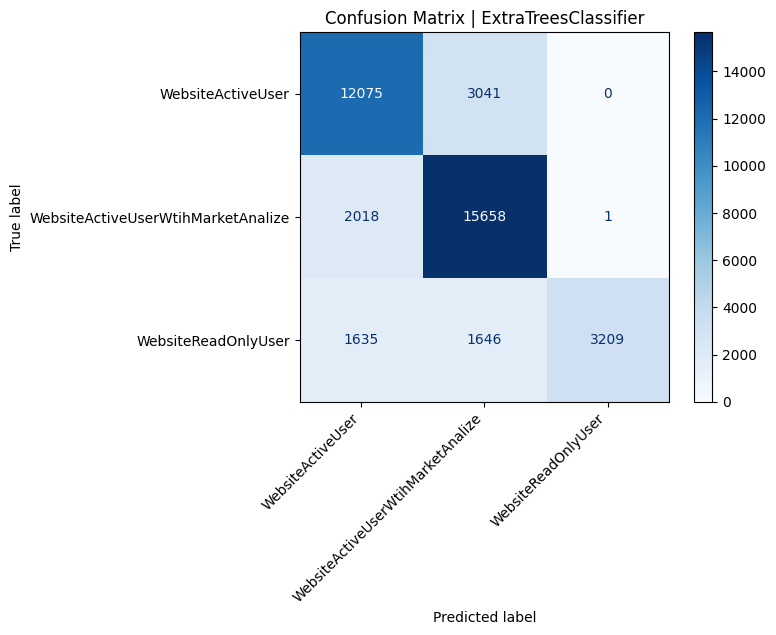

DecisionTreeClassifier time: 0.5456299781799316
              precision    recall  f1-score   support

           0       0.77      0.80      0.78     15116
           1       0.77      0.88      0.82     17677
           2       1.00      0.49      0.66      6490

    accuracy                           0.79     39283
   macro avg       0.84      0.73      0.76     39283
weighted avg       0.81      0.79      0.78     39283



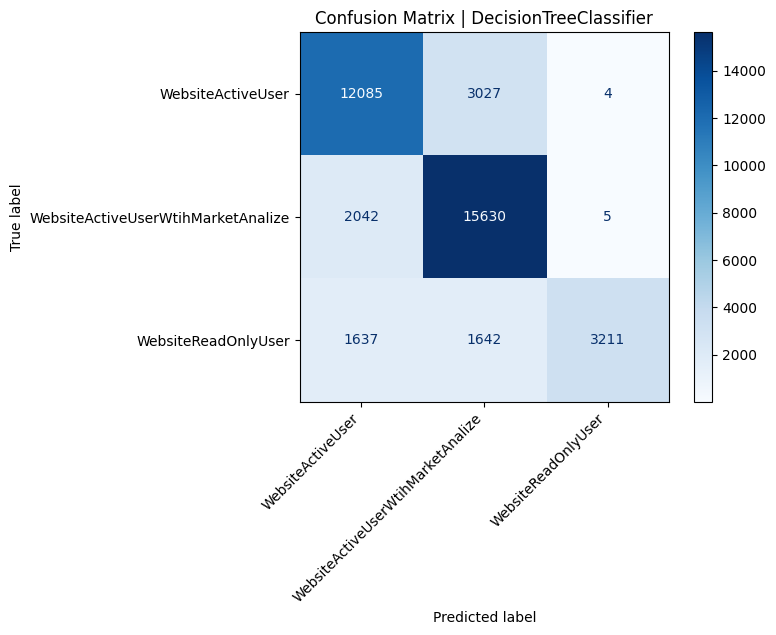

KNeighborsClassifier time: 1.5733964443206787
              precision    recall  f1-score   support

           0       0.74      0.75      0.75     15116
           1       0.76      0.85      0.80     17677
           2       0.84      0.54      0.66      6490

    accuracy                           0.76     39283
   macro avg       0.78      0.72      0.74     39283
weighted avg       0.77      0.76      0.76     39283



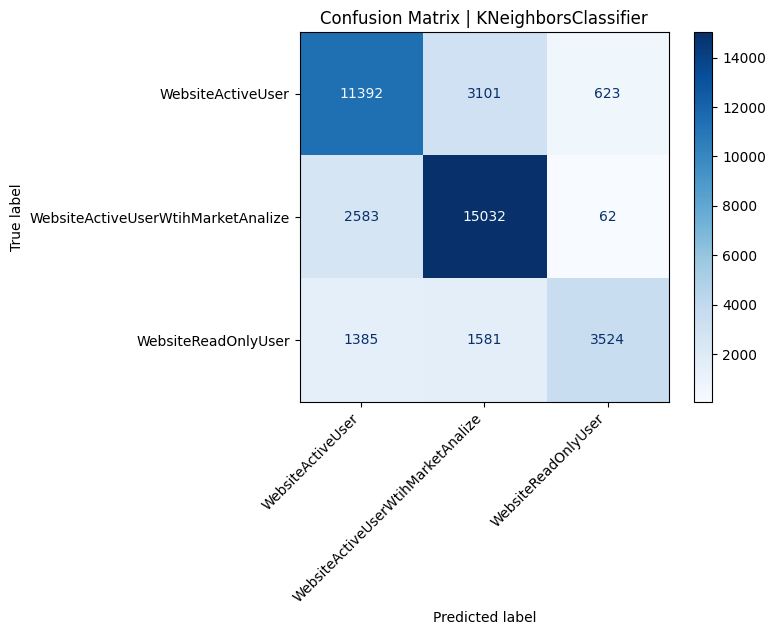

RandomForestClassifier time: 58.81187415122986
              precision    recall  f1-score   support

           0       0.77      0.80      0.78     15116
           1       0.77      0.89      0.82     17677
           2       1.00      0.49      0.66      6490

    accuracy                           0.79     39283
   macro avg       0.84      0.73      0.76     39283
weighted avg       0.81      0.79      0.78     39283



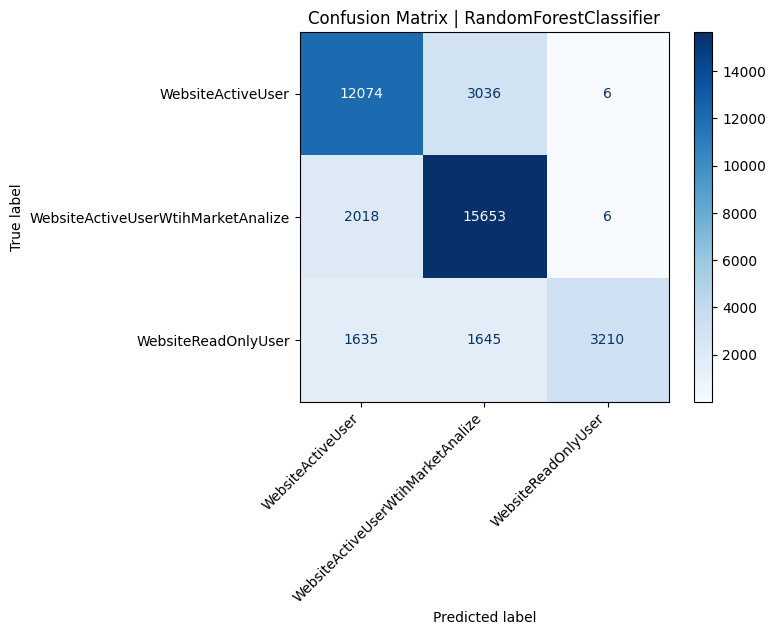

LinearSVC time: 0.7031540870666504
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     15116
           1       0.70      0.89      0.78     17677
           2       0.90      0.19      0.31      6490

    accuracy                           0.73     39283
   macro avg       0.79      0.62      0.62     39283
weighted avg       0.76      0.73      0.70     39283



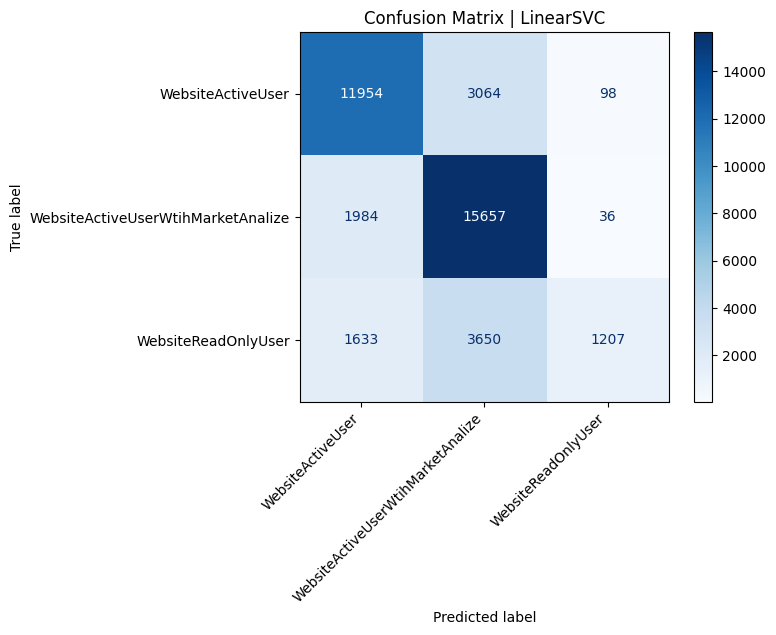

MLPClassifier time: 581.3261134624481
              precision    recall  f1-score   support

           0       0.77      0.80      0.78     15116
           1       0.77      0.89      0.82     17677
           2       0.99      0.50      0.66      6490

    accuracy                           0.79     39283
   macro avg       0.84      0.73      0.76     39283
weighted avg       0.81      0.79      0.78     39283



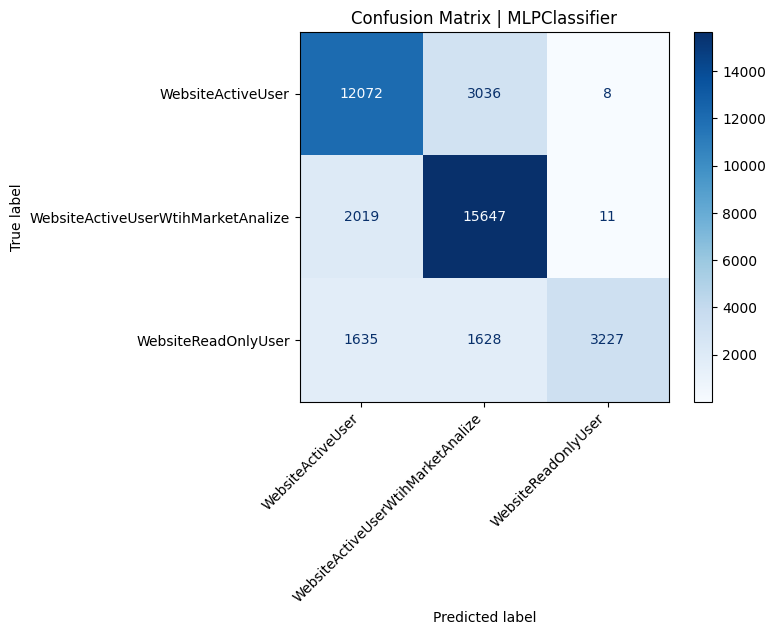

60_A+NA+AZA_30s_200ms_3
Xgb time: 1.2895145416259766
              precision    recall  f1-score   support

           0       0.67      0.78      0.72     14297
           1       0.72      0.75      0.73     15694
           2       0.98      0.52      0.68      6454

    accuracy                           0.72     36445
   macro avg       0.79      0.68      0.71     36445
weighted avg       0.75      0.72      0.72     36445



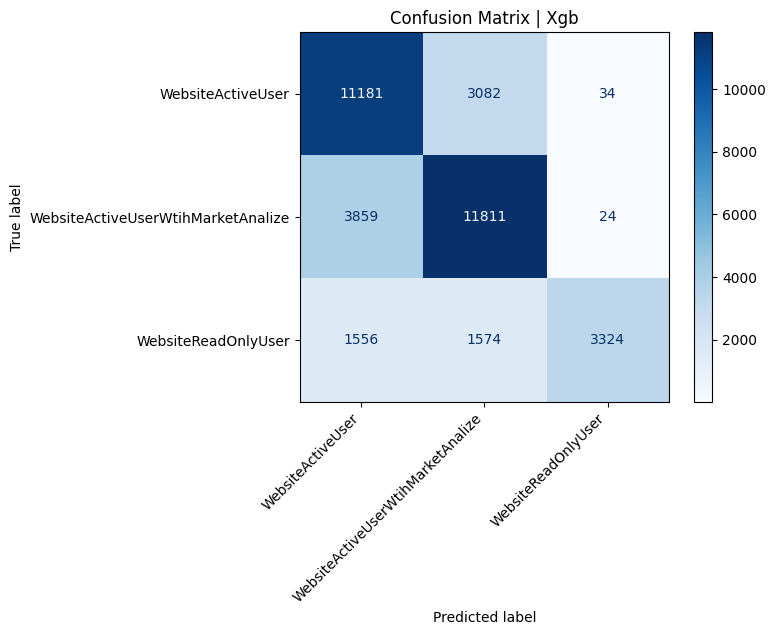

ExtraTreesClassifier time: 21.70340657234192
              precision    recall  f1-score   support

           0       0.67      0.79      0.73     14297
           1       0.72      0.75      0.74     15694
           2       1.00      0.51      0.67      6454

    accuracy                           0.72     36445
   macro avg       0.80      0.68      0.71     36445
weighted avg       0.75      0.72      0.72     36445



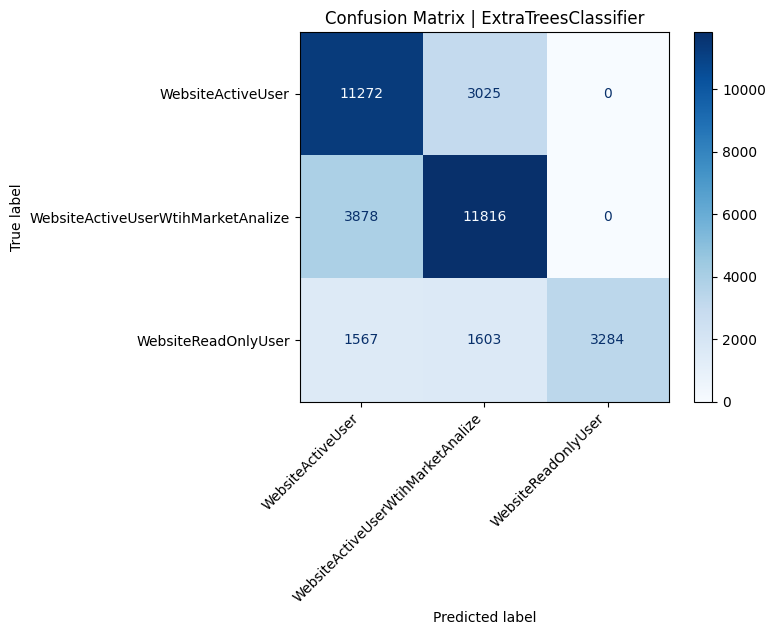

DecisionTreeClassifier time: 0.484041690826416
              precision    recall  f1-score   support

           0       0.67      0.79      0.73     14297
           1       0.72      0.75      0.74     15694
           2       0.99      0.51      0.68      6454

    accuracy                           0.72     36445
   macro avg       0.80      0.68      0.71     36445
weighted avg       0.75      0.72      0.72     36445



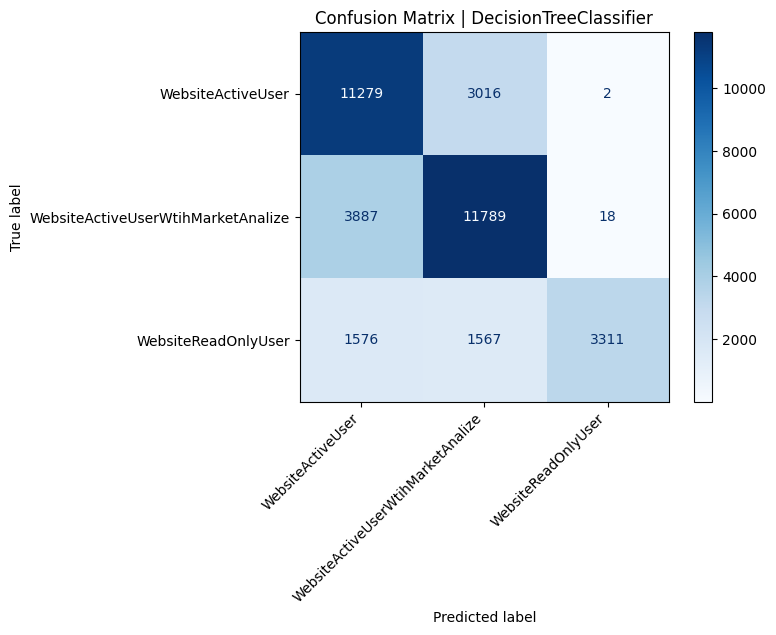

KNeighborsClassifier time: 1.5822346210479736
              precision    recall  f1-score   support

           0       0.64      0.68      0.66     14297
           1       0.68      0.74      0.71     15694
           2       0.83      0.57      0.68      6454

    accuracy                           0.68     36445
   macro avg       0.72      0.66      0.68     36445
weighted avg       0.69      0.68      0.68     36445



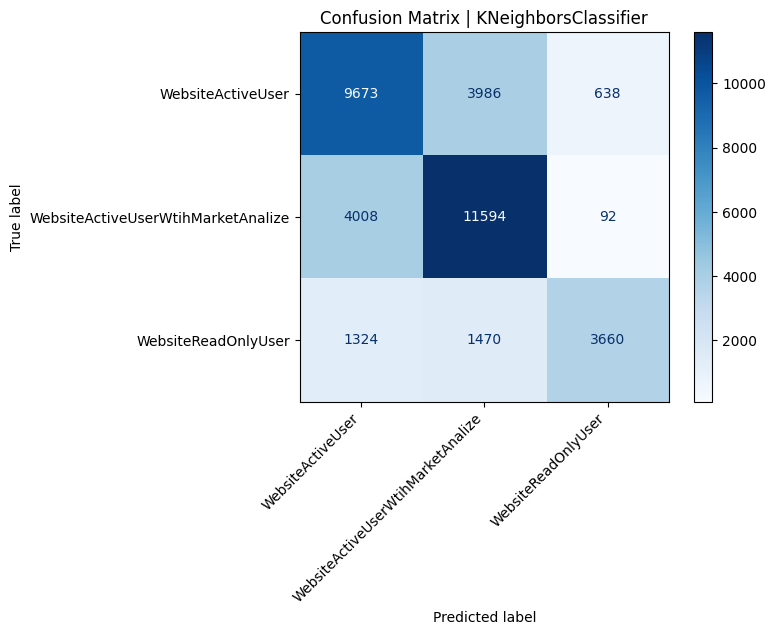

RandomForestClassifier time: 53.151246547698975
              precision    recall  f1-score   support

           0       0.67      0.79      0.73     14297
           1       0.72      0.75      0.74     15694
           2       1.00      0.51      0.68      6454

    accuracy                           0.72     36445
   macro avg       0.80      0.68      0.71     36445
weighted avg       0.75      0.72      0.72     36445



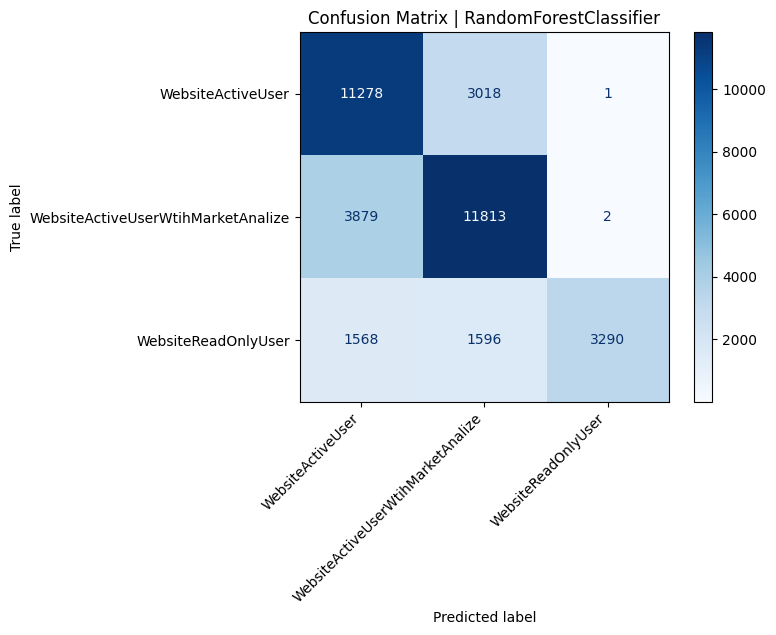

LinearSVC time: 0.9190089702606201
              precision    recall  f1-score   support

           0       0.67      0.67      0.67     14297
           1       0.64      0.76      0.70     15694
           2       0.40      0.23      0.29      6454

    accuracy                           0.63     36445
   macro avg       0.57      0.55      0.55     36445
weighted avg       0.61      0.63      0.61     36445



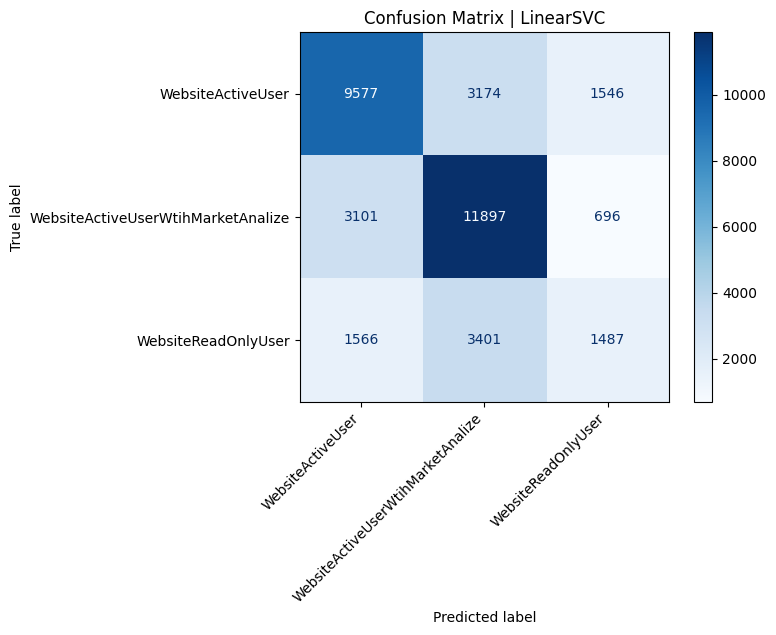

MLPClassifier time: 774.9690687656403
              precision    recall  f1-score   support

           0       0.67      0.79      0.73     14297
           1       0.72      0.75      0.74     15694
           2       0.99      0.51      0.68      6454

    accuracy                           0.72     36445
   macro avg       0.80      0.68      0.71     36445
weighted avg       0.75      0.72      0.72     36445



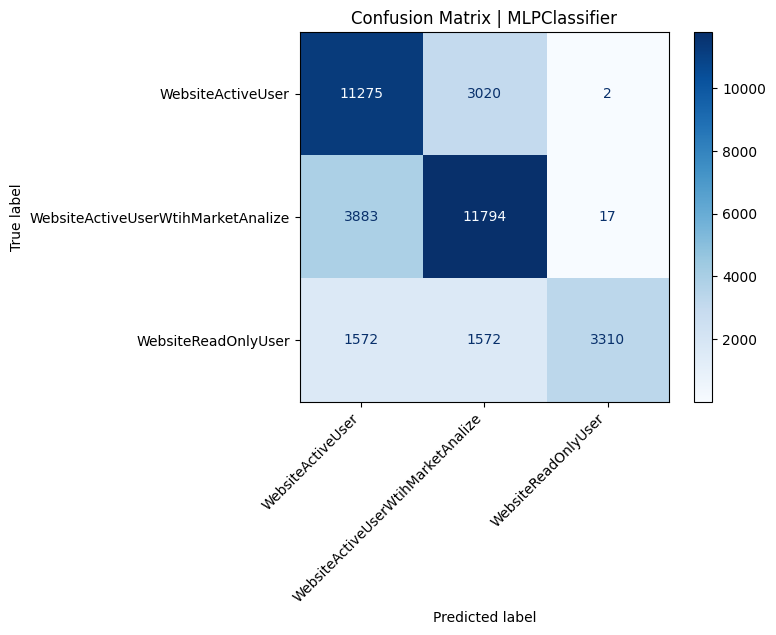

60_A+NA+AZA_30s_1100ms_3
Xgb time: 1.2531099319458008
              precision    recall  f1-score   support

           0       0.61      0.75      0.68     11852
           1       0.80      0.77      0.78     20023
           2       0.99      0.50      0.67      3968

    accuracy                           0.73     35843
   macro avg       0.80      0.67      0.71     35843
weighted avg       0.76      0.73      0.73     35843



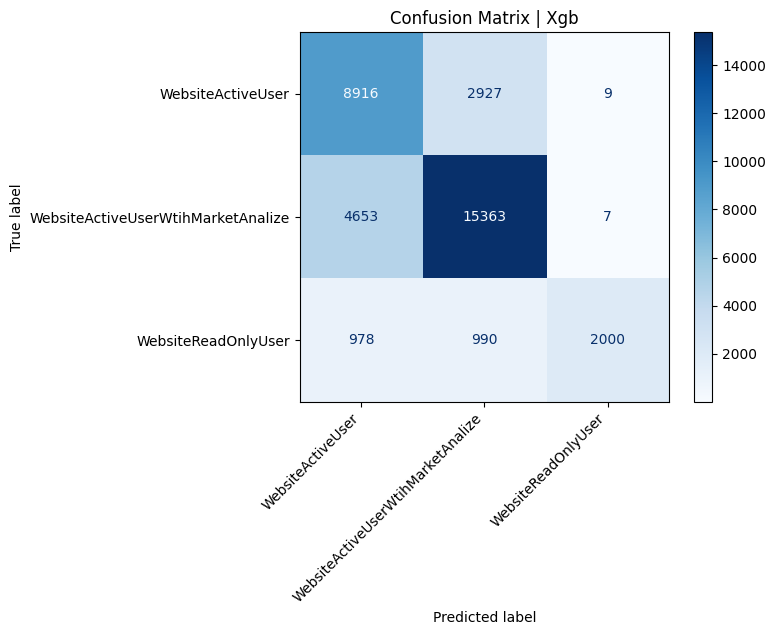

ExtraTreesClassifier time: 21.319676399230957
              precision    recall  f1-score   support

           0       0.61      0.79      0.69     11852
           1       0.81      0.75      0.78     20023
           2       1.00      0.50      0.67      3968

    accuracy                           0.74     35843
   macro avg       0.81      0.68      0.71     35843
weighted avg       0.77      0.74      0.74     35843



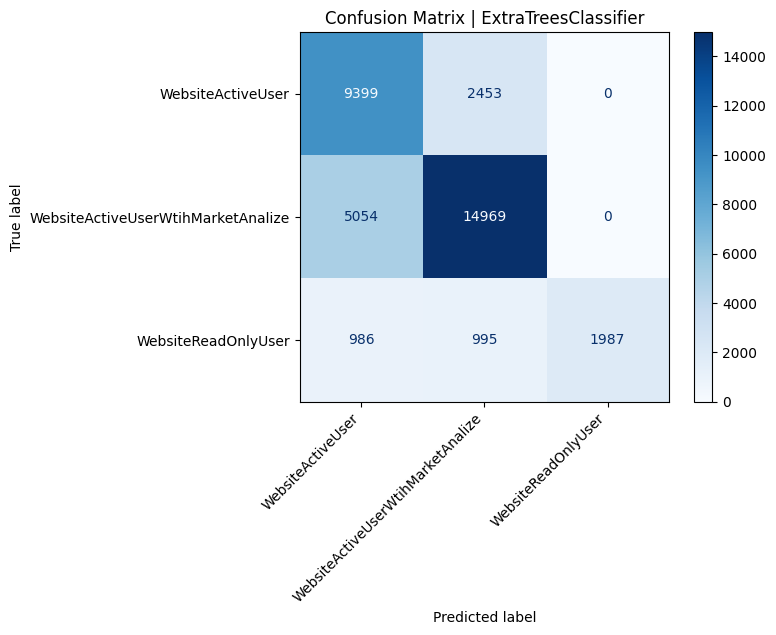

DecisionTreeClassifier time: 0.48476386070251465
              precision    recall  f1-score   support

           0       0.61      0.79      0.69     11852
           1       0.81      0.75      0.78     20023
           2       1.00      0.50      0.67      3968

    accuracy                           0.73     35843
   macro avg       0.81      0.68      0.71     35843
weighted avg       0.77      0.73      0.74     35843



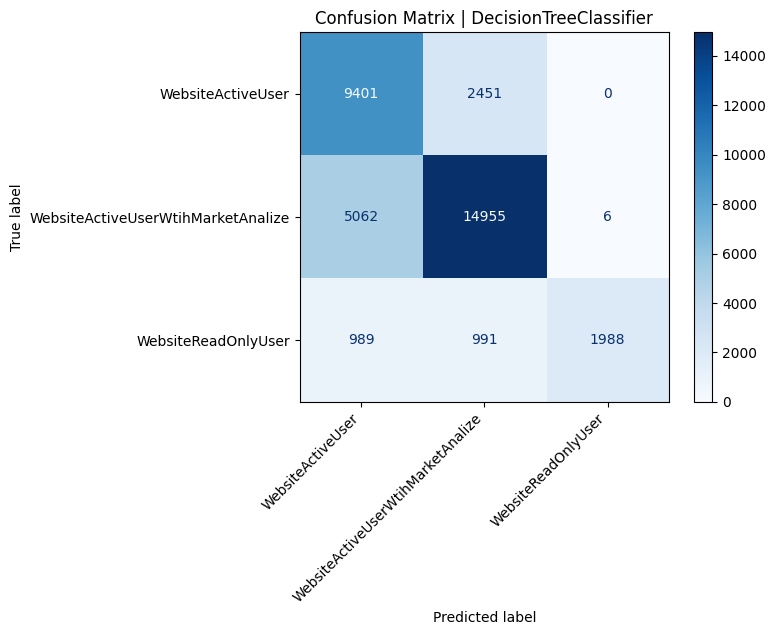

KNeighborsClassifier time: 1.545365810394287
              precision    recall  f1-score   support

           0       0.61      0.58      0.59     11852
           1       0.74      0.82      0.78     20023
           2       0.88      0.53      0.66      3968

    accuracy                           0.71     35843
   macro avg       0.74      0.64      0.68     35843
weighted avg       0.71      0.71      0.71     35843



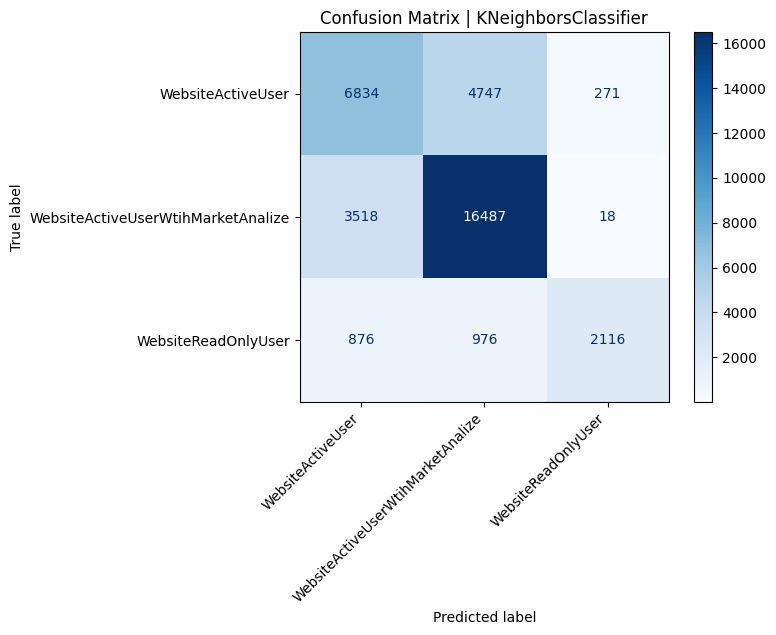

RandomForestClassifier time: 52.941001892089844
              precision    recall  f1-score   support

           0       0.61      0.79      0.69     11852
           1       0.81      0.75      0.78     20023
           2       1.00      0.50      0.67      3968

    accuracy                           0.74     35843
   macro avg       0.81      0.68      0.71     35843
weighted avg       0.77      0.74      0.74     35843



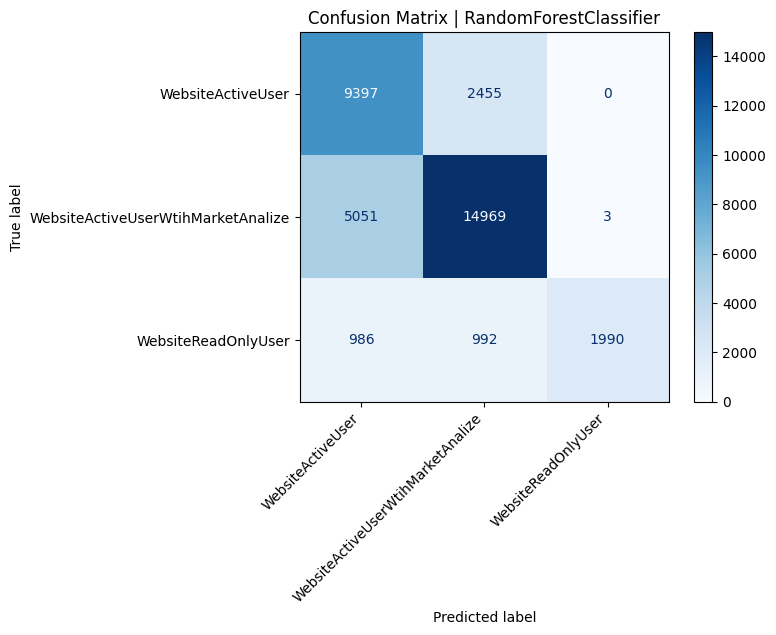

LinearSVC time: 0.9150102138519287
              precision    recall  f1-score   support

           0       0.61      0.72      0.66     11852
           1       0.74      0.76      0.75     20023
           2       0.35      0.12      0.18      3968

    accuracy                           0.68     35843
   macro avg       0.57      0.53      0.53     35843
weighted avg       0.66      0.68      0.66     35843



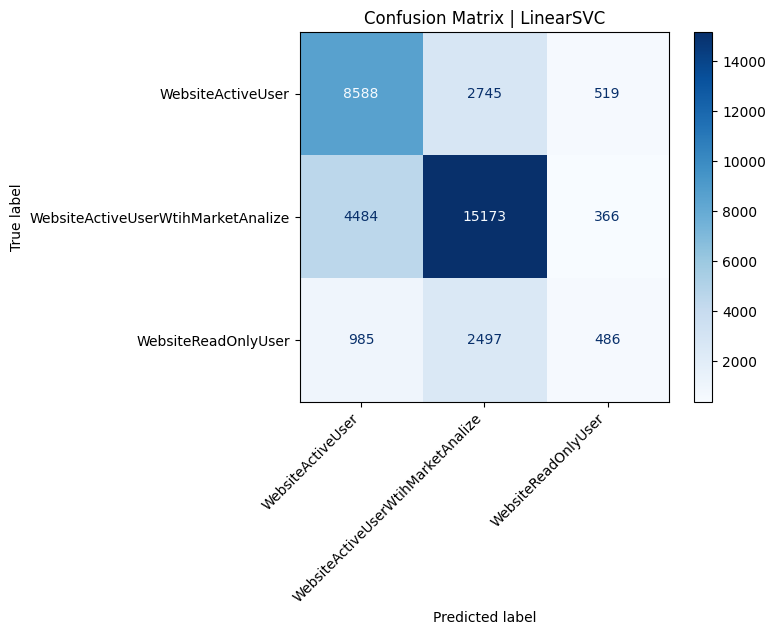

MLPClassifier time: 354.38044571876526
              precision    recall  f1-score   support

           0       0.61      0.79      0.69     11852
           1       0.81      0.75      0.78     20023
           2       1.00      0.50      0.67      3968

    accuracy                           0.74     35843
   macro avg       0.81      0.68      0.71     35843
weighted avg       0.77      0.74      0.74     35843



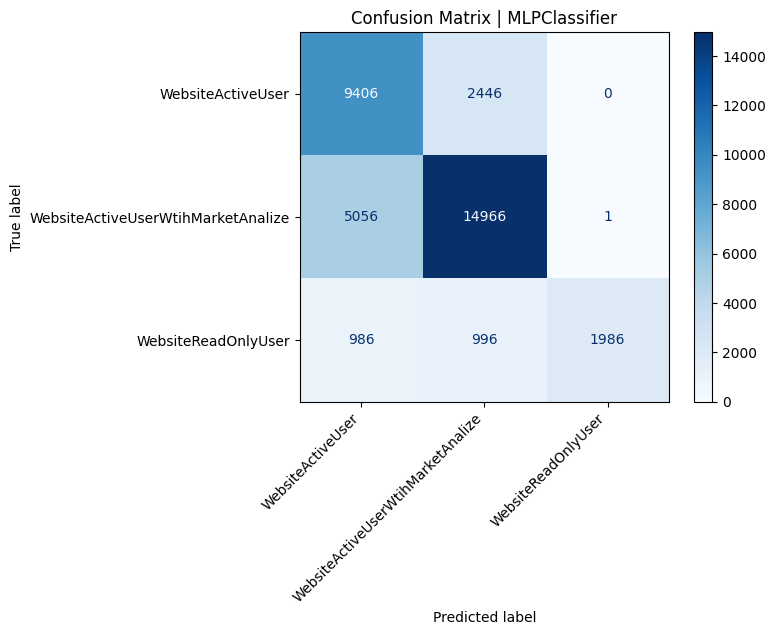

60_A+NA+AZA_5s_600ms_3
Xgb time: 1.2052998542785645
              precision    recall  f1-score   support

           0       0.67      0.78      0.72     12857
           1       0.77      0.78      0.78     17247
           2       0.99      0.51      0.67      4976

    accuracy                           0.74     35080
   macro avg       0.81      0.69      0.72     35080
weighted avg       0.76      0.74      0.74     35080



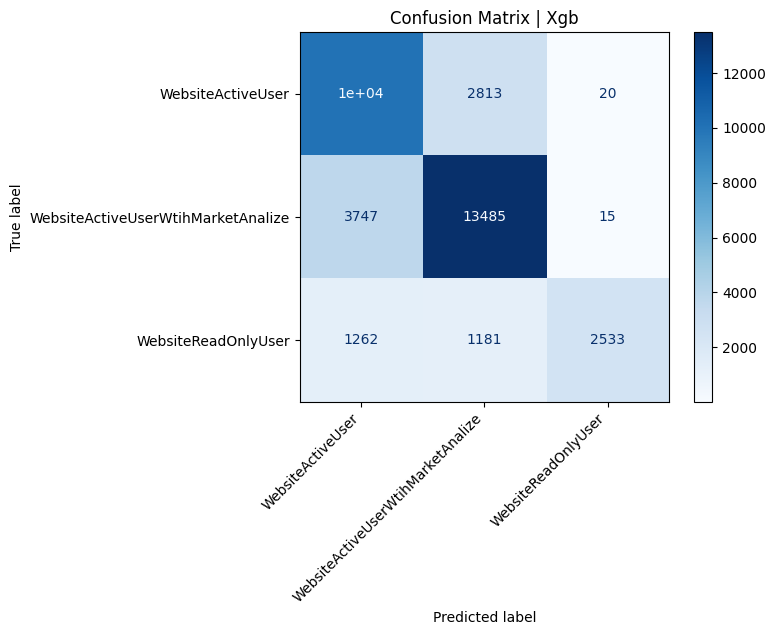

ExtraTreesClassifier time: 20.689400672912598
              precision    recall  f1-score   support

           0       0.67      0.79      0.72     12857
           1       0.77      0.78      0.78     17247
           2       1.00      0.51      0.67      4976

    accuracy                           0.74     35080
   macro avg       0.81      0.69      0.72     35080
weighted avg       0.77      0.74      0.74     35080



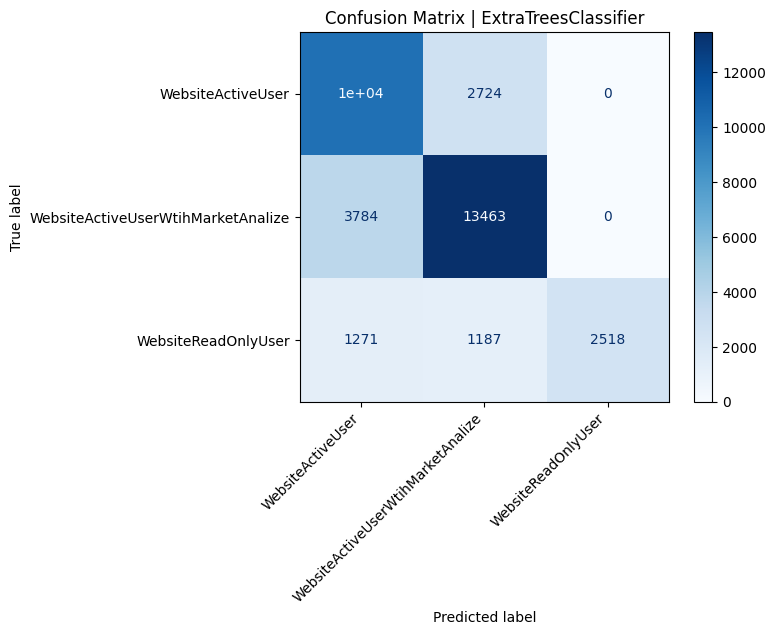

DecisionTreeClassifier time: 0.4662034511566162
              precision    recall  f1-score   support

           0       0.67      0.79      0.72     12857
           1       0.77      0.78      0.78     17247
           2       0.99      0.51      0.67      4976

    accuracy                           0.74     35080
   macro avg       0.81      0.69      0.72     35080
weighted avg       0.77      0.74      0.74     35080



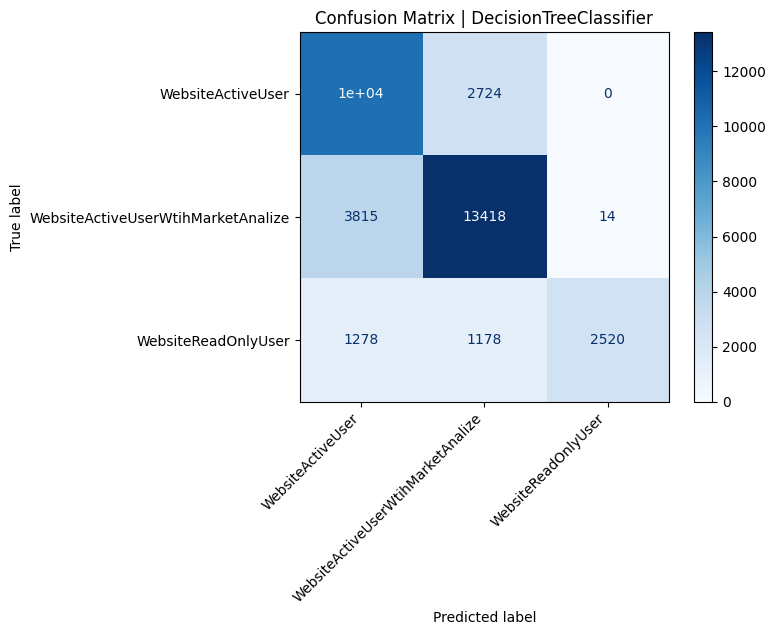

KNeighborsClassifier time: 1.531815767288208
              precision    recall  f1-score   support

           0       0.65      0.67      0.66     12857
           1       0.74      0.79      0.76     17247
           2       0.85      0.55      0.67      4976

    accuracy                           0.71     35080
   macro avg       0.74      0.67      0.70     35080
weighted avg       0.72      0.71      0.71     35080



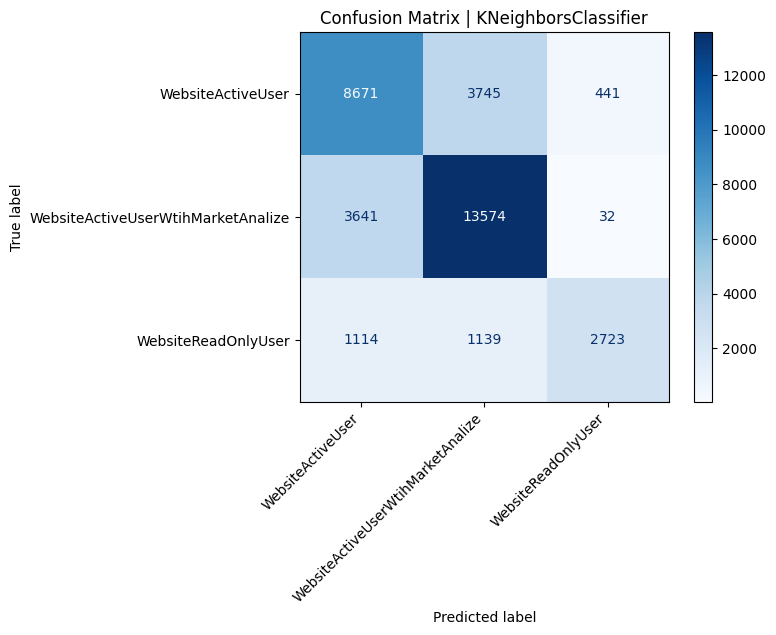

RandomForestClassifier time: 51.70510816574097
              precision    recall  f1-score   support

           0       0.67      0.79      0.72     12857
           1       0.77      0.78      0.78     17247
           2       1.00      0.51      0.67      4976

    accuracy                           0.74     35080
   macro avg       0.81      0.69      0.72     35080
weighted avg       0.77      0.74      0.74     35080



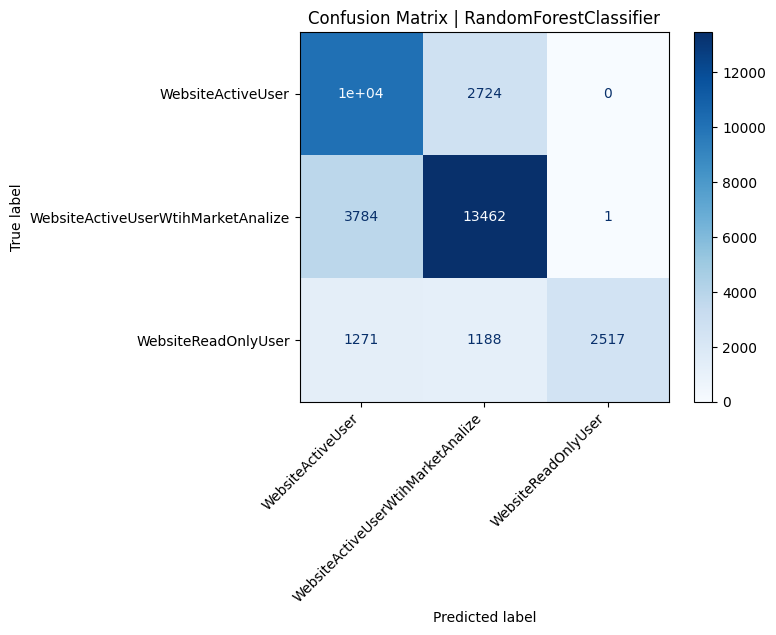

LinearSVC time: 0.7017545700073242
              precision    recall  f1-score   support

           0       0.67      0.75      0.71     12857
           1       0.69      0.79      0.74     17247
           2       0.63      0.13      0.22      4976

    accuracy                           0.68     35080
   macro avg       0.66      0.56      0.56     35080
weighted avg       0.68      0.68      0.65     35080



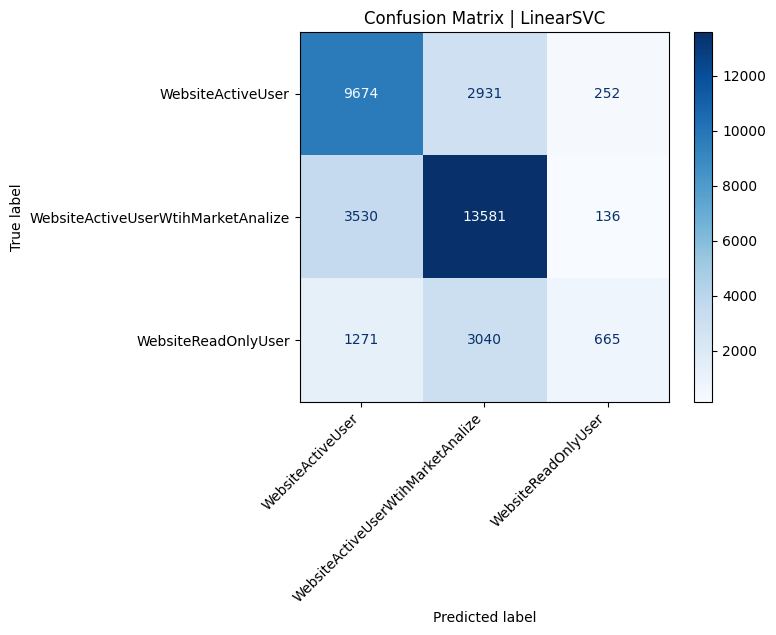

MLPClassifier time: 1374.3886234760284
              precision    recall  f1-score   support

           0       0.67      0.79      0.72     12857
           1       0.77      0.78      0.78     17247
           2       1.00      0.51      0.67      4976

    accuracy                           0.74     35080
   macro avg       0.81      0.69      0.72     35080
weighted avg       0.77      0.74      0.74     35080



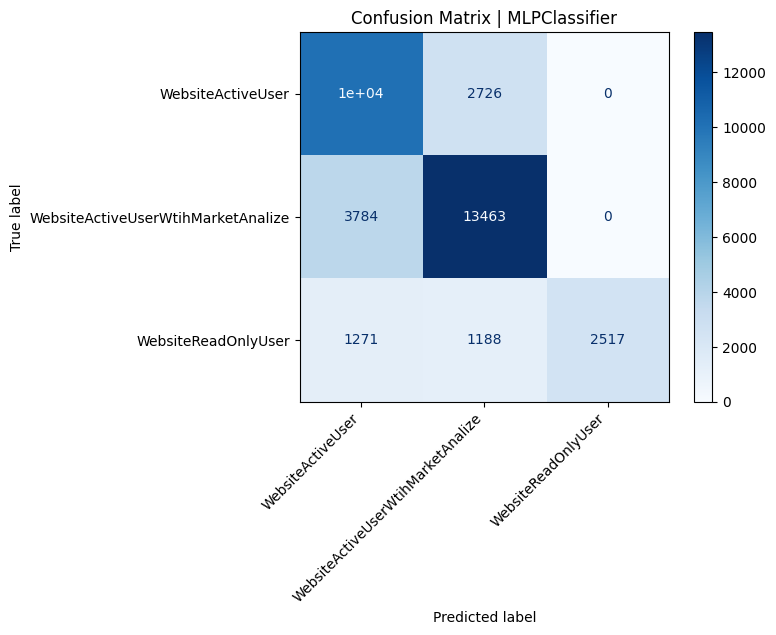

60_A+NA+AZA_50s_600ms_3
Xgb time: 1.3487181663513184
              precision    recall  f1-score   support

           0       0.64      0.77      0.70     13402
           1       0.76      0.74      0.75     17917
           2       0.98      0.51      0.67      5146

    accuracy                           0.72     36465
   macro avg       0.79      0.68      0.71     36465
weighted avg       0.75      0.72      0.72     36465



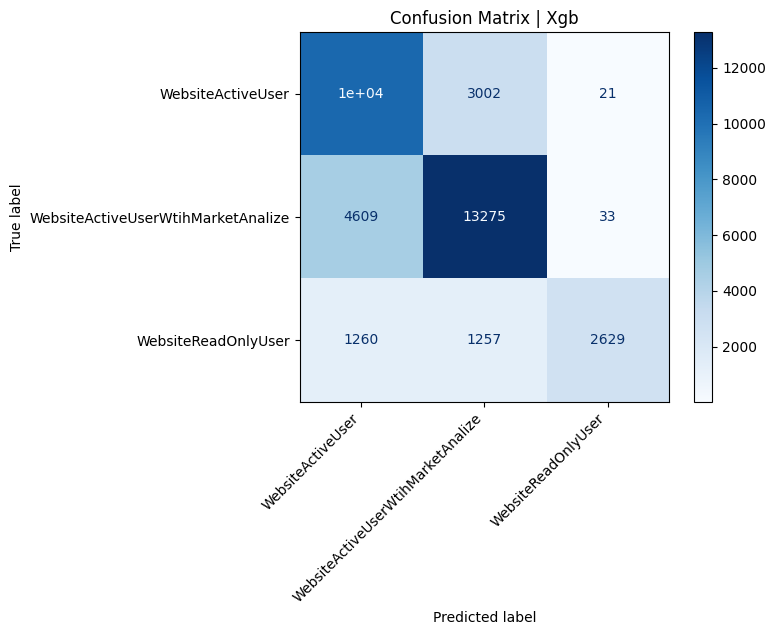

ExtraTreesClassifier time: 23.652039527893066
              precision    recall  f1-score   support

           0       0.64      0.79      0.70     13402
           1       0.76      0.74      0.75     17917
           2       1.00      0.50      0.67      5146

    accuracy                           0.72     36465
   macro avg       0.80      0.68      0.71     36465
weighted avg       0.75      0.72      0.72     36465



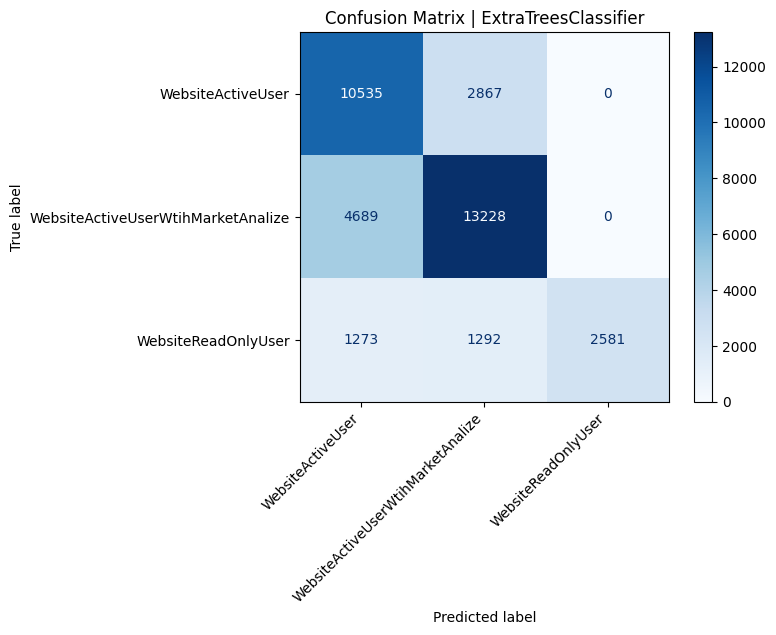

DecisionTreeClassifier time: 0.5444011688232422
              precision    recall  f1-score   support

           0       0.64      0.79      0.70     13402
           1       0.76      0.74      0.75     17917
           2       0.98      0.51      0.67      5146

    accuracy                           0.72     36465
   macro avg       0.79      0.68      0.71     36465
weighted avg       0.75      0.72      0.72     36465



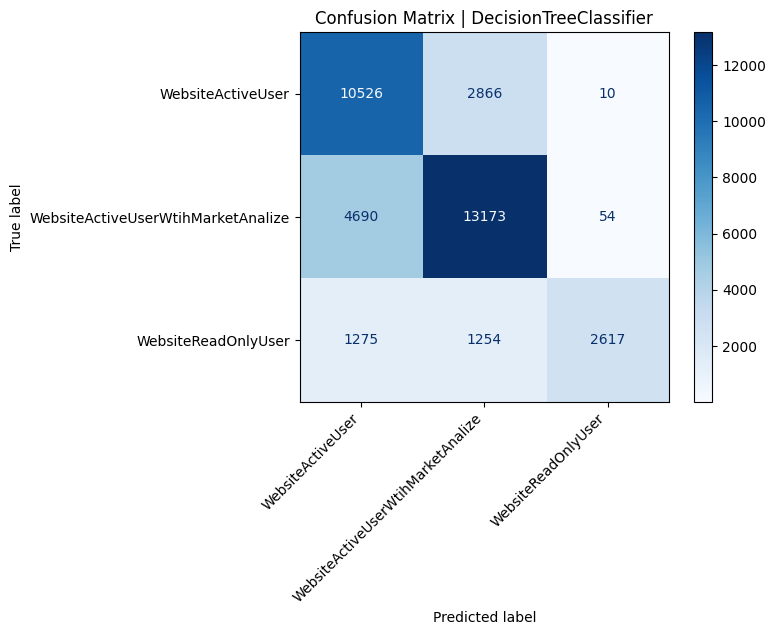

KNeighborsClassifier time: 1.809865951538086
              precision    recall  f1-score   support

           0       0.62      0.63      0.62     13402
           1       0.70      0.77      0.74     17917
           2       0.85      0.54      0.66      5146

    accuracy                           0.69     36465
   macro avg       0.73      0.65      0.67     36465
weighted avg       0.69      0.69      0.68     36465



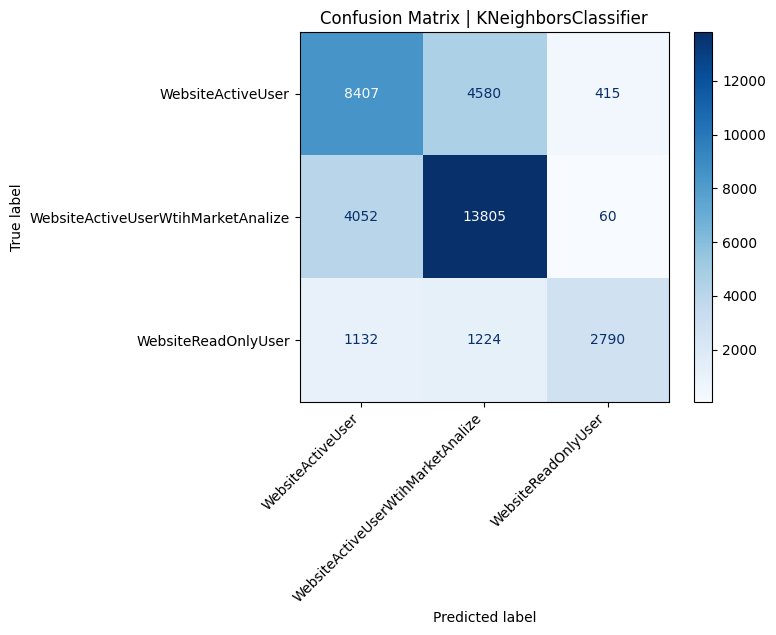

RandomForestClassifier time: 60.70162892341614
              precision    recall  f1-score   support

           0       0.64      0.79      0.70     13402
           1       0.76      0.74      0.75     17917
           2       0.98      0.51      0.67      5146

    accuracy                           0.72     36465
   macro avg       0.79      0.68      0.71     36465
weighted avg       0.75      0.72      0.72     36465



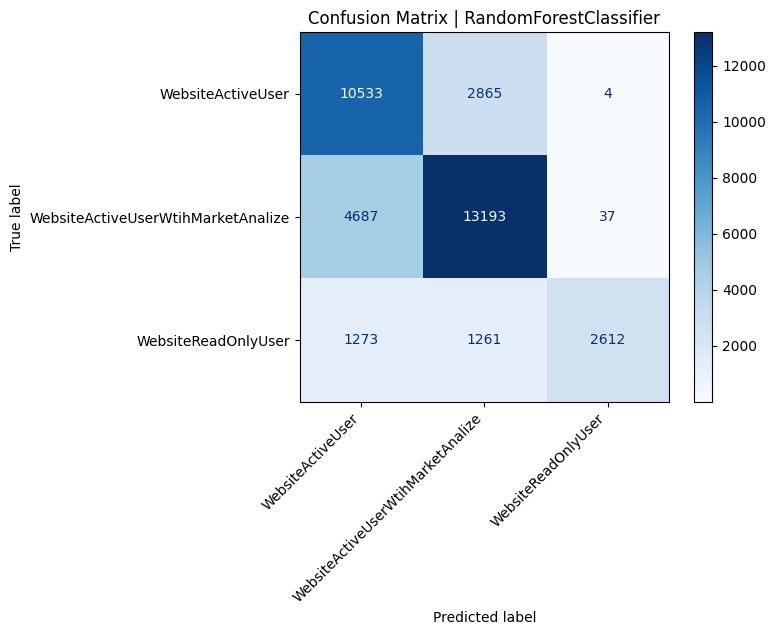

LinearSVC time: 1.019176721572876
              precision    recall  f1-score   support

           0       0.64      0.71      0.67     13402
           1       0.69      0.75      0.72     17917
           2       0.42      0.18      0.25      5146

    accuracy                           0.65     36465
   macro avg       0.58      0.54      0.55     36465
weighted avg       0.63      0.65      0.63     36465



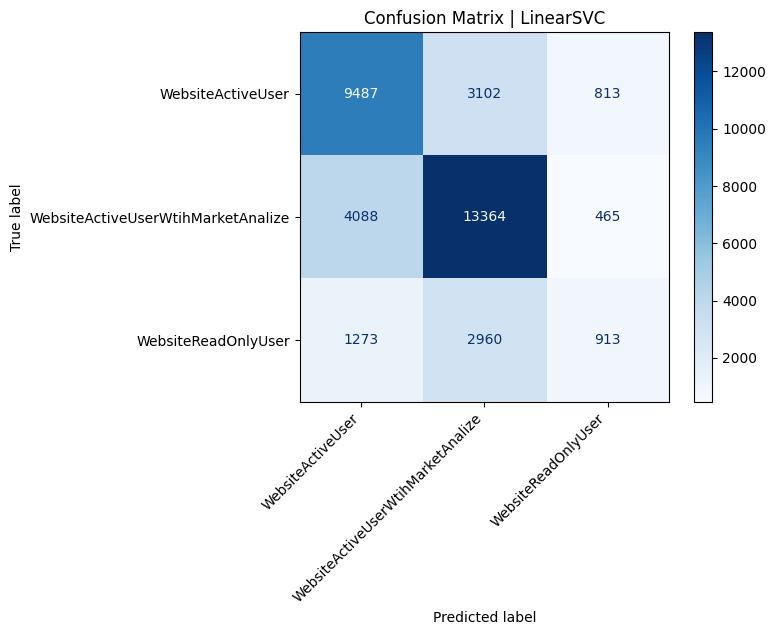

MLPClassifier time: 1873.9519259929657
              precision    recall  f1-score   support

           0       0.64      0.79      0.70     13402
           1       0.76      0.74      0.75     17917
           2       0.98      0.51      0.67      5146

    accuracy                           0.72     36465
   macro avg       0.79      0.68      0.71     36465
weighted avg       0.75      0.72      0.72     36465



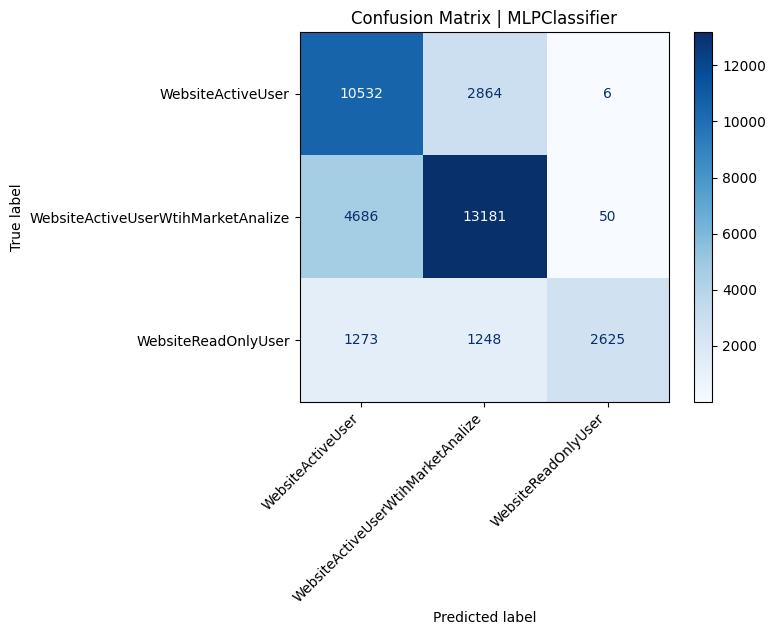

60_A+NA+AZA_30s_600ms_2
Xgb time: 1.282618761062622
              precision    recall  f1-score   support

           0       0.64      0.78      0.70     13233
           1       0.76      0.74      0.75     17735
           2       0.98      0.51      0.67      5114

    accuracy                           0.72     36082
   macro avg       0.79      0.68      0.71     36082
weighted avg       0.75      0.72      0.72     36082



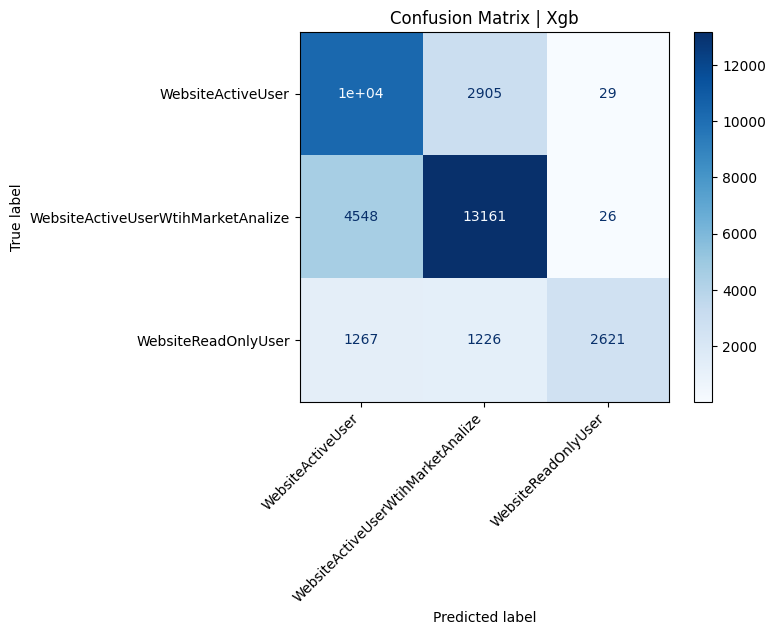

ExtraTreesClassifier time: 21.576524257659912
              precision    recall  f1-score   support

           0       0.64      0.79      0.71     13233
           1       0.77      0.74      0.75     17735
           2       1.00      0.50      0.67      5114

    accuracy                           0.73     36082
   macro avg       0.80      0.68      0.71     36082
weighted avg       0.75      0.73      0.72     36082



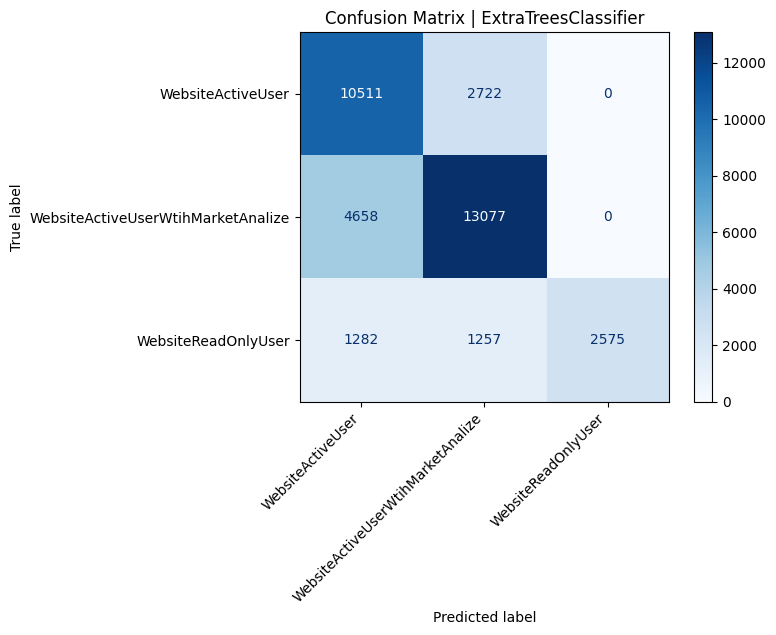

DecisionTreeClassifier time: 0.4821903705596924
              precision    recall  f1-score   support

           0       0.64      0.79      0.71     13233
           1       0.77      0.74      0.75     17735
           2       0.99      0.51      0.67      5114

    accuracy                           0.72     36082
   macro avg       0.80      0.68      0.71     36082
weighted avg       0.75      0.72      0.72     36082



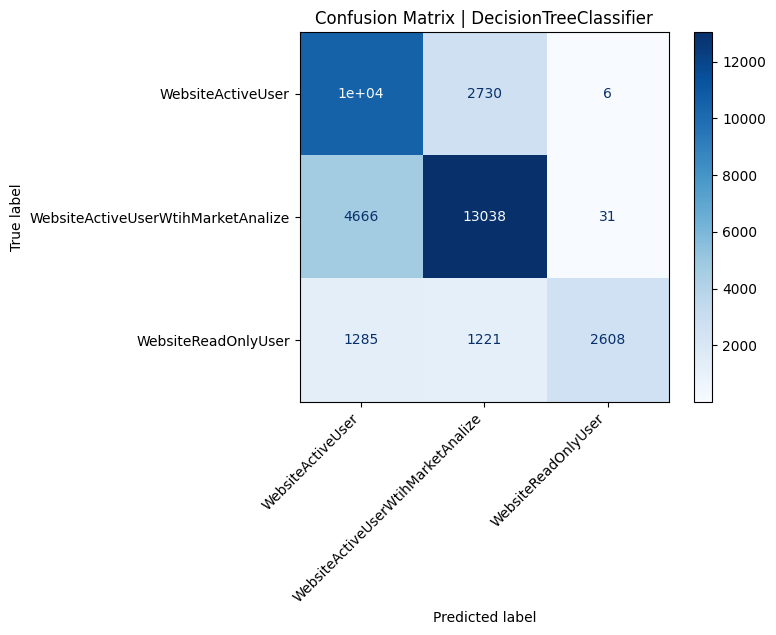

KNeighborsClassifier time: 1.6127562522888184
              precision    recall  f1-score   support

           0       0.62      0.63      0.62     13233
           1       0.71      0.77      0.74     17735
           2       0.85      0.55      0.67      5114

    accuracy                           0.69     36082
   macro avg       0.73      0.65      0.68     36082
weighted avg       0.70      0.69      0.69     36082



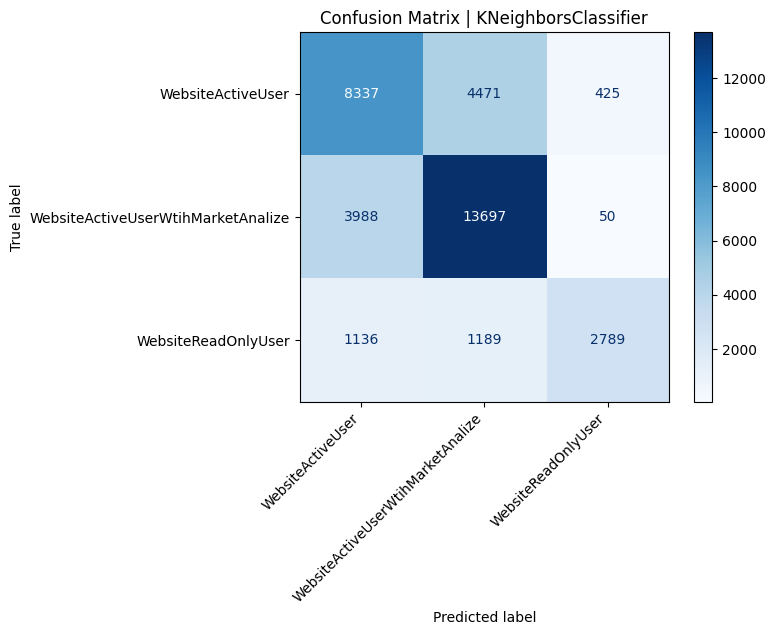

RandomForestClassifier time: 55.70091700553894
              precision    recall  f1-score   support

           0       0.64      0.79      0.71     13233
           1       0.77      0.74      0.75     17735
           2       0.99      0.51      0.67      5114

    accuracy                           0.73     36082
   macro avg       0.80      0.68      0.71     36082
weighted avg       0.75      0.73      0.72     36082



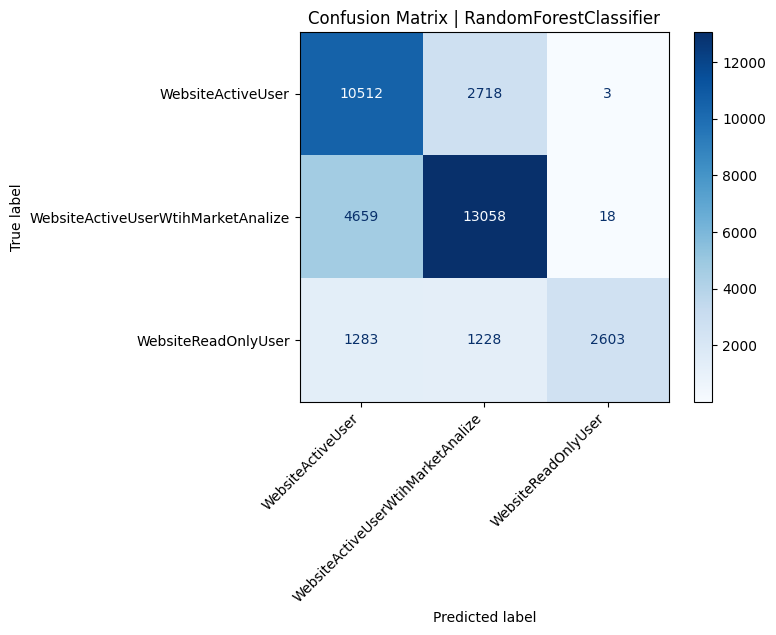

LinearSVC time: 0.9663774967193604
              precision    recall  f1-score   support

           0       0.64      0.72      0.68     13233
           1       0.69      0.75      0.72     17735
           2       0.43      0.18      0.26      5114

    accuracy                           0.66     36082
   macro avg       0.59      0.55      0.55     36082
weighted avg       0.64      0.66      0.64     36082



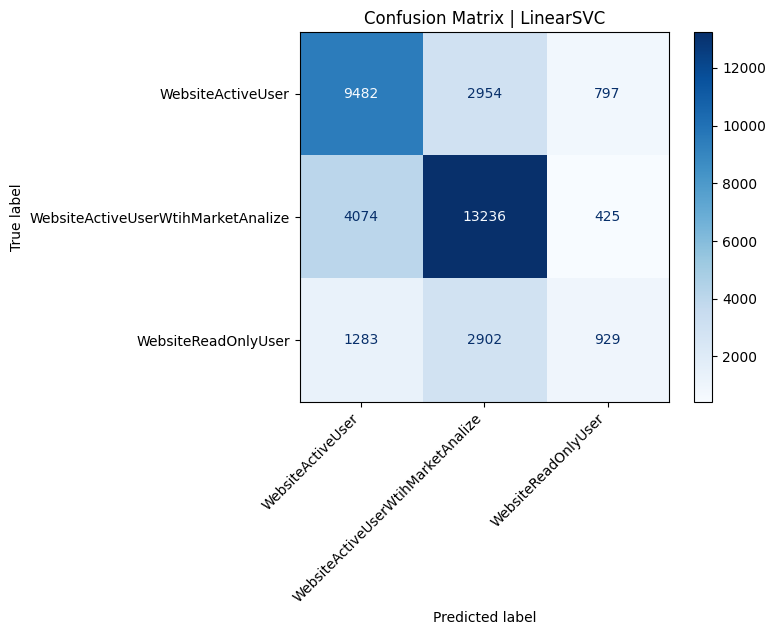

MLPClassifier time: 671.4183070659637
              precision    recall  f1-score   support

           0       0.64      0.79      0.71     13233
           1       0.77      0.74      0.75     17735
           2       1.00      0.50      0.67      5114

    accuracy                           0.73     36082
   macro avg       0.80      0.68      0.71     36082
weighted avg       0.75      0.73      0.72     36082



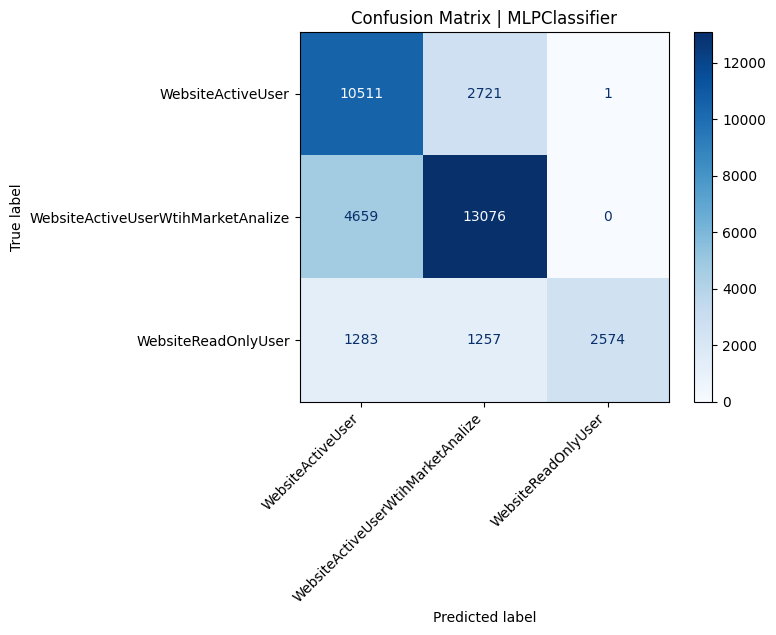

60_A+NA+AZA_30s_600ms_8
Xgb time: 3.1627955436706543
              precision    recall  f1-score   support

           0       0.65      0.78      0.71     13122
           1       0.77      0.76      0.76     17502
           2       0.98      0.51      0.67      5057

    accuracy                           0.73     35681
   macro avg       0.80      0.68      0.72     35681
weighted avg       0.76      0.73      0.73     35681



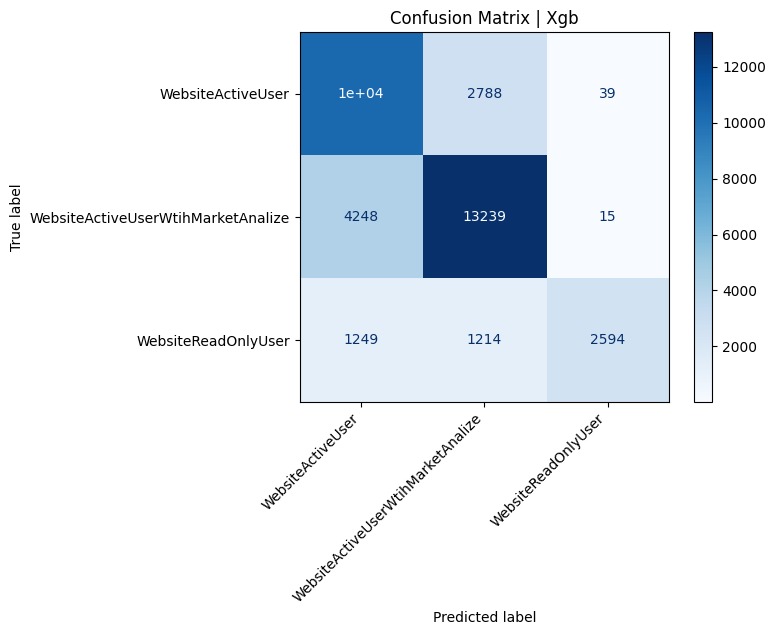

ExtraTreesClassifier time: 52.348769664764404
              precision    recall  f1-score   support

           0       0.65      0.80      0.72     13122
           1       0.77      0.75      0.76     17502
           2       1.00      0.51      0.67      5057

    accuracy                           0.73     35681
   macro avg       0.81      0.69      0.72     35681
weighted avg       0.76      0.73      0.73     35681



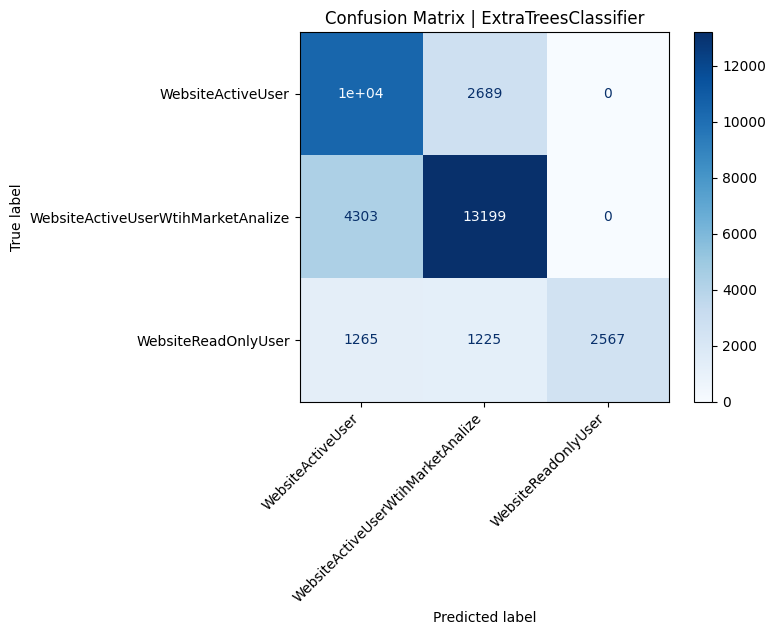

DecisionTreeClassifier time: 1.1838347911834717
              precision    recall  f1-score   support

           0       0.65      0.79      0.72     13122
           1       0.77      0.75      0.76     17502
           2       1.00      0.51      0.67      5057

    accuracy                           0.73     35681
   macro avg       0.81      0.69      0.72     35681
weighted avg       0.76      0.73      0.73     35681



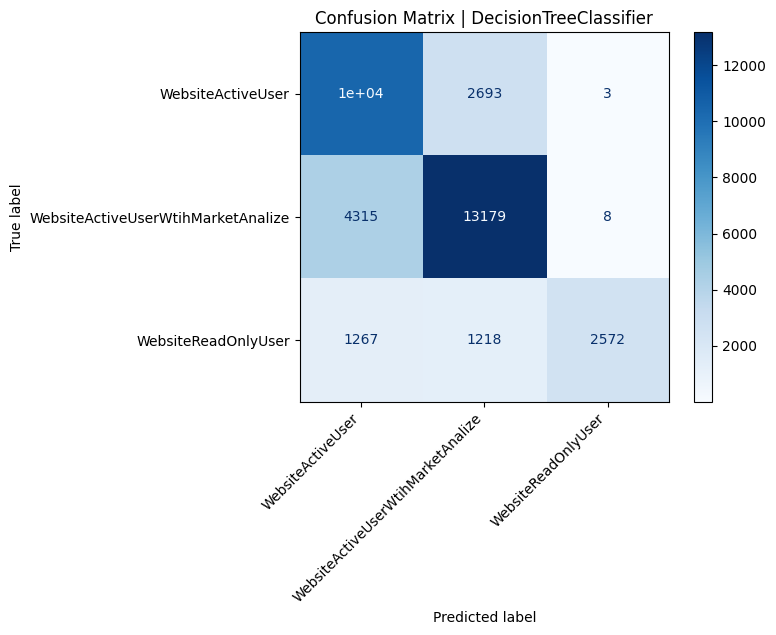

KNeighborsClassifier time: 5.41991114616394
              precision    recall  f1-score   support

           0       0.63      0.64      0.64     13122
           1       0.72      0.78      0.75     17502
           2       0.84      0.55      0.67      5057

    accuracy                           0.70     35681
   macro avg       0.73      0.66      0.68     35681
weighted avg       0.70      0.70      0.69     35681



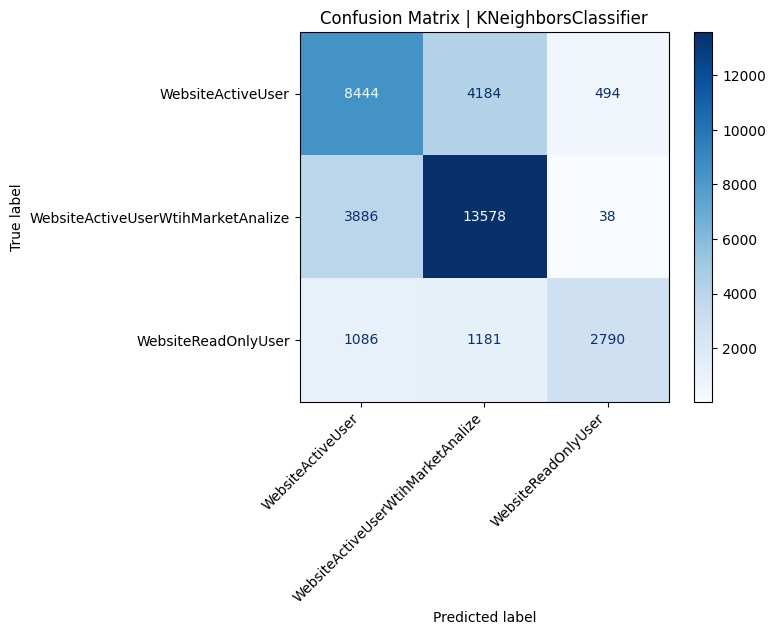

RandomForestClassifier time: 139.07670187950134
              precision    recall  f1-score   support

           0       0.65      0.80      0.72     13122
           1       0.77      0.75      0.76     17502
           2       1.00      0.51      0.67      5057

    accuracy                           0.73     35681
   macro avg       0.81      0.69      0.72     35681
weighted avg       0.76      0.73      0.73     35681



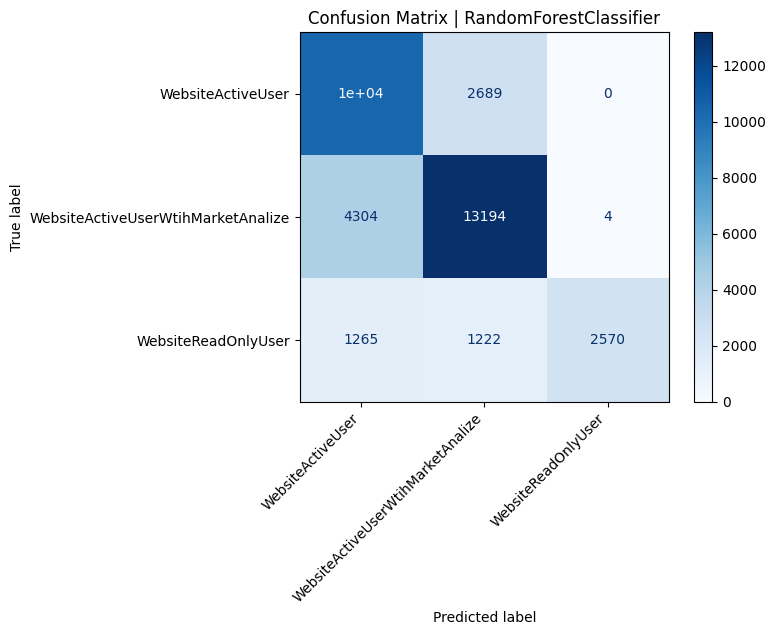

LinearSVC time: 1.8466150760650635
              precision    recall  f1-score   support

           0       0.65      0.76      0.70     13122
           1       0.69      0.76      0.72     17502
           2       0.63      0.15      0.25      5057

    accuracy                           0.67     35681
   macro avg       0.66      0.56      0.56     35681
weighted avg       0.67      0.67      0.65     35681



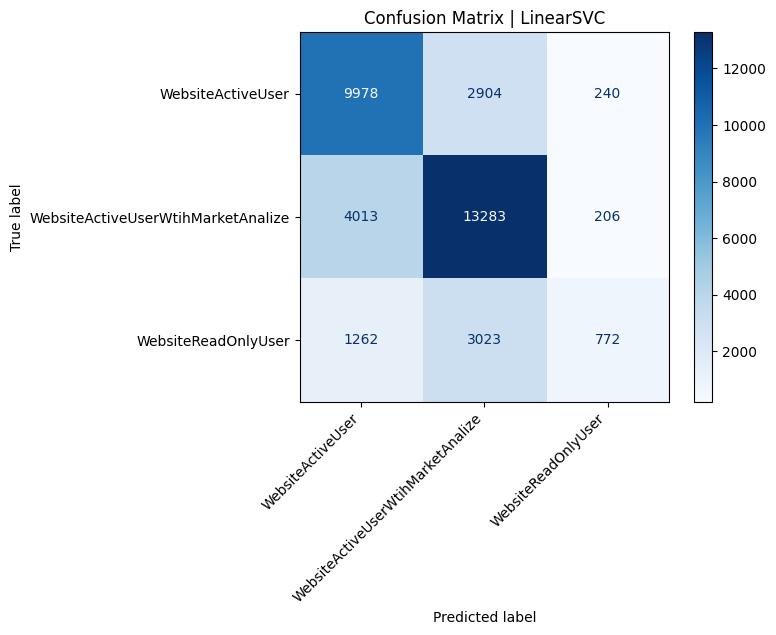

MLPClassifier time: 1451.2595539093018
              precision    recall  f1-score   support

           0       0.65      0.80      0.72     13122
           1       0.77      0.75      0.76     17502
           2       0.99      0.51      0.67      5057

    accuracy                           0.73     35681
   macro avg       0.81      0.69      0.72     35681
weighted avg       0.76      0.73      0.73     35681



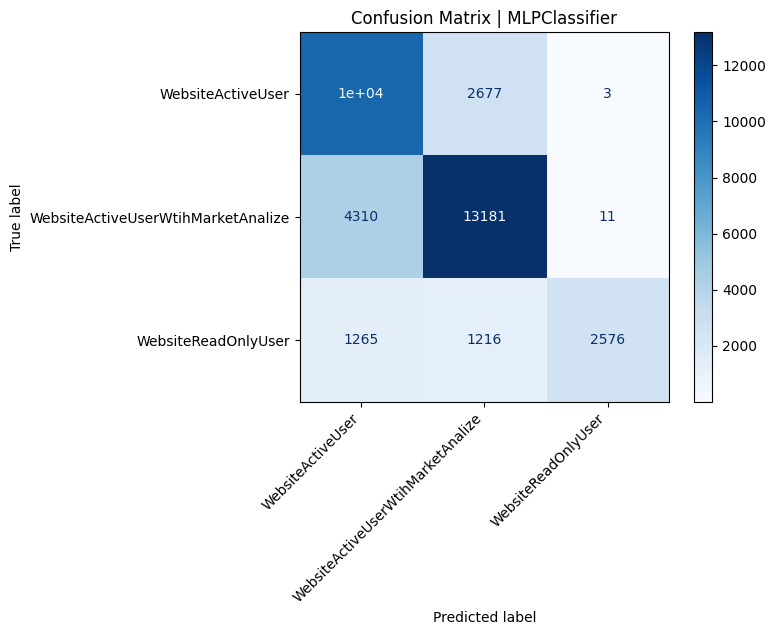

In [4]:
def multiClass(path, param,method):
    start_time = time.time()
    file_path = f'{path}/stockApp_merged_data.csv'
    data = pd.read_csv(file_path)
    classes= sorted(data[param].unique())
    mapping = {url: i for i, url in enumerate(classes)}
    data['mapped'] = data[param].map(mapping)
    if param != 'endpoint_url':
      urls = sorted(data['endpoint_url'].unique())
      url_mapping = {url: i for i, url in enumerate(urls)}
      data['endpoint_url_mapped'] = data['endpoint_url'].map(url_mapping)
      data = data[['mapped', 'endpoint_url_mapped', 'application_time', 'database_time', 'api_time', 'cpu_usage_db_test', 'cpu_usage_db', 'cpu_usage_web']]
    if param == 'endpoint_url':
      data = data[['mapped', 'application_time', 'database_time', 'api_time', 'cpu_usage_db_test', 'cpu_usage_db', 'cpu_usage_web']]
    X = data.drop(columns=['mapped'])
    y = data['mapped']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42,stratify=y)
    if method == 'ExtraTreesClassifier':
      model = ExtraTreesClassifier(n_estimators=1000, random_state=42, criterion='gini', max_depth=10, min_samples_split=4, max_features='sqrt', bootstrap=False) 
    if method == 'DecisionTreeClassifier':
      model = DecisionTreeClassifier(random_state=42, max_depth=8, criterion='gini', max_features='sqrt', min_samples_split=8, splitter='best', ccp_alpha=0)
    if method == 'KNeighborsClassifier':
      model = KNeighborsClassifier(n_neighbors=7, algorithm='auto', leaf_size=20, weights='uniform')
    if method == 'LinearSVC':
      model = LinearSVC(multi_class='ovr', class_weight='balanced', max_iter=10000, C=10,loss='squared_hinge', penalty='l1', random_state=42)
      sc=StandardScaler()
      scaler = sc.fit(X_train)
      X_train = scaler.transform(X_train)
      X_test = scaler.transform(X_test)
    if method == 'MLPClassifier':
      model = MLPClassifier(random_state=42, alpha=0.0001, learning_rate='constant' , max_iter=200, batch_size=16, hidden_layer_sizes=(120,80,40), solver='adam', activation='relu')
      sc=StandardScaler()
      scaler = sc.fit(X_train)
      X_train = scaler.transform(X_train)
      X_test = scaler.transform(X_test)
    if method == 'RandomForestClassifier':
      model = RandomForestClassifier(max_depth=8, random_state=42, criterion='gini', n_estimators=500, min_samples_split=8, max_features='sqrt', bootstrap=False)
    if method == 'Xgb':
      model = xgb.XGBClassifier(booster = 'gbtree',objective='multi:softmax',num_class=len(classes),random_state = 42)
      param_grid = {
        'reg_lambda':[0,0.3,1],
        'gamma':[0,1,2],
        'grow_policy':['depthwise', 'lossguide'],
        'learning_rate':[0.05, 0.3, 0.6], 
        'max_depth':[8,10,12],
        'n_estimators':[100,200,300]
      }
      #grid = GridSearchCV(model, param_grid, cv=2)
      #grid.fit(X_train, y_train)
      #print(grid.best_estimator_)
      #print(grid.best_params_)
      #print(grid.best_score_)  
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    #accuracy = accuracy_score(y_test, y_pred)
    #f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'{method} time: {time.time() - start_time}')
    #print(f'{method} - Accuracy: {accuracy}')
    #print(f'{method} - F1 Score: {f1}')
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mapping.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix | {method}')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    plt.close()
i=0    
for test_dir in file_paths2:
  print(labels2[i])
  methods = ['Xgb', 'ExtraTreesClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'RandomForestClassifier', 'LinearSVC','MLPClassifier']
  for method in methods:
    multiClass(test_dir, 'user_class',method)
  i += 1